## Overview

This notebook allows to follow all the processing perfromed in the Behavioral_Analysis notebook ( which run behavioral_analysis functions)
It sometimes try to clarify some potential complications


In [22]:
import os
import pickle
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt #Creation de graphiques et de visualisations comme matlab
from matplotlib.patches import Polygon #Creation de graphiques et de visualisations comme matlab
#from matplotlib import cm
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
from scipy.ndimage import gaussian_filter as smooth
#import gc
import glob
#import time
from behavior_analysis_functions import list_sessions_analyzed, \
                                    process_session, html_mouse, load_data, MOUSE_STRING


In [3]:
# the path_to_data_folder is the path of the folder where you store your different mice.

# Windows:
# path_to_data_folder='C:'+os.sep+'Users'+os.sep+'MORVAN'+os.sep+'Documents'+os.sep+'patchouris'+os.sep+'Sample_Data'+os.sep
# Linux:
# path_to_data_folder '/home/david/Documents/Code/ForagingProject/Patchouris/patchouris/Sample_Data/'
# MacOs
#path_to_data_folder = '/Users/davidrobbe/Documents/Science/Data/ForagingMice/'


#path_to_data_folder='/home/david/Documents/David/Data/'
path_to_data_folder='/LocalData/ForagingMice/JAK2Data'
path_to_data_folder = '/Users/davidrobbe/Documents/Science/Data/ForagingMice/'


pattern_of_MOU_Folders = os.path.join(path_to_data_folder, "MOU*")

# List all mice in the data folder (If you want to process all the mice in your data folder),
mice_list = [os.path.basename(path) for path in glob.glob(pattern_of_MOU_Folders)]
mice_list=sorted(mice_list)
print(f'Found {len(mice_list)} {"mice" if len(mice_list) > 1 else "mouse"} in the data folder:')


#If you want to process a subset of mice uncomment the line below and comment the 2 lines above

#mice_list: list[str] = ["MOU2334"]  # For processing  a single mice. Equivalent to mice_list = ["MOU2334"] but more correct as it forces to create a list of string
#mice_list=['MOU2329', 'MOU2330', 'MOU2331', 'MOU2332', 'MOU2333', 'MOU2334']
#print(f'Found {len(mice_list)} {"mice" if len(mice_list) > 1 else "mouse"} in the data folder:')

session_list = {}
for mouse in mice_list:
    mouse_folder = os.path.join(path_to_data_folder,mouse)
    session_list[mouse] = sorted([name for name in os.listdir(mouse_folder)
                           if os.path.isdir(os.path.join(mouse_folder, name))
                           and name.startswith('MOU')])
    nb_sessions = len(session_list[mouse])
    print(f'Hello, I\'m {mouse}! I have foraged for {nb_sessions} sessions:')
    print(session_list[mouse], '\n')








Found 8 mice in the data folder:
Hello, I'm MOU2329! I have foraged for 22 sessions:
['MOU2329_20240607-1315', 'MOU2329_20240607-1714', 'MOU2329_20240610-0936', 'MOU2329_20240610-1336', 'MOU2329_20240611-0915', 'MOU2329_20240611-1324', 'MOU2329_20240612-0918', 'MOU2329_20240612-1341', 'MOU2329_20240613-0914', 'MOU2329_20240613-1405', 'MOU2329_20240614-0820', 'MOU2329_20240614-1331', 'MOU2329_20240617-0829', 'MOU2329_20240617-1420', 'MOU2329_20240618-0829', 'MOU2329_20240618-1451', 'MOU2329_20240619-0828', 'MOU2329_20240619-1406', 'MOU2329_20240620-0821', 'MOU2329_20240620-1339', 'MOU2329_20240621-0829', 'MOU2329_20240621-1425'] 

Hello, I'm MOU2330! I have foraged for 22 sessions:
['MOU2330_20240607-1335', 'MOU2330_20240607-1733', 'MOU2330_20240610-0956', 'MOU2330_20240610-1357', 'MOU2330_20240611-0936', 'MOU2330_20240611-1342', 'MOU2330_20240612-0937', 'MOU2330_20240612-1400', 'MOU2330_20240613-0933', 'MOU2330_20240613-1424', 'MOU2330_20240614-0840', 'MOU2330_20240614-1351', 'MOU2330_

We just print the list of mice, the dictionnany of sessions across mice and then we will choose a single mice and single session for illustration purpose

In [4]:
mice_list

['MOU2329',
 'MOU2330',
 'MOU2331',
 'MOU2332',
 'MOU2333',
 'MOU2334',
 'MOU4087',
 'MOU4175']

In [5]:
session_list

{'MOU2329': ['MOU2329_20240607-1315',
  'MOU2329_20240607-1714',
  'MOU2329_20240610-0936',
  'MOU2329_20240610-1336',
  'MOU2329_20240611-0915',
  'MOU2329_20240611-1324',
  'MOU2329_20240612-0918',
  'MOU2329_20240612-1341',
  'MOU2329_20240613-0914',
  'MOU2329_20240613-1405',
  'MOU2329_20240614-0820',
  'MOU2329_20240614-1331',
  'MOU2329_20240617-0829',
  'MOU2329_20240617-1420',
  'MOU2329_20240618-0829',
  'MOU2329_20240618-1451',
  'MOU2329_20240619-0828',
  'MOU2329_20240619-1406',
  'MOU2329_20240620-0821',
  'MOU2329_20240620-1339',
  'MOU2329_20240621-0829',
  'MOU2329_20240621-1425'],
 'MOU2330': ['MOU2330_20240607-1335',
  'MOU2330_20240607-1733',
  'MOU2330_20240610-0956',
  'MOU2330_20240610-1357',
  'MOU2330_20240611-0936',
  'MOU2330_20240611-1342',
  'MOU2330_20240612-0937',
  'MOU2330_20240612-1400',
  'MOU2330_20240613-0933',
  'MOU2330_20240613-1424',
  'MOU2330_20240614-0840',
  'MOU2330_20240614-1351',
  'MOU2330_20240617-0848',
  'MOU2330_20240617-1438',
  'MO

In [6]:
illustration_mouse_folder_path=os.path.join(path_to_data_folder,mice_list[0])
print(illustration_mouse_folder_path)

/Users/davidrobbe/Documents/Science/Data/ForagingMice/MOU2329


In [7]:
illustration_foragiong_session=session_list[mice_list[0]][11]
print(illustration_foragiong_session)

MOU2329_20240614-1331


Some basic information about the foraging environment.

In [8]:
######################################
# maze information
######################################

# Mice have to run around 4 towers to obtain rewards. Rewards are delivered when a mouse switch from one trapeze to another concurrent trapeze

video_resolution = 512, 512 # this gives the resolution in pixel of the video recorded(trajectory of the mice in the maze)  
trapeze_width = 50 # rewards are delivered in the maze around 4 towers,  when mice a switch from one trapze to another



#        +-----------------+                            +-----------------+
#        | \  Trapeze N  / |                            | \  Trapeze N  / |
#        |  +-----------+  |                            |  +-----------+  |
#        |  |           |  |                            |  |           |  |
#        |TW|   Tower   |TE|                            |TW|   Tower   |TE|
#        |  |     NW    |  |                            |  |     NE    |  |
#        |  |           |  |                            |  |           |  |
#        |  +-----------+  |                            |  +-----------+  |
#        | /    Trap S   \ |                            | /    Trap S   \ |
#        +-----------------+                            +-----------------+





#        +-----------------+                            +-----------------+
#        | \  Trapeze N  / |                            | \  Trapeze N  / |
#        |  +-----------+  |                            |  +-----------+  |
#        |  |           |  |                            |  |           |  |
#        |TW|   Tower   |TE|                            |TW|   Tower   |TE|
#        |  |     SW    |  |                            |  |     SE    |  |
#        |  |           |  |                            |  |           |  |
#        |  +-----------+  |                            |  +-----------+  |
#        | /    Trap S   \ |                            | /    Trap S   \ |
#        +-----------------+                            +-----------------+


# We therefore need  the coordinate of the 4 towers and the trapeze. The coordinate are given in the reference frame of the video. 
# The video has a resolution of 512 pixeld in trapeze_width and in height. The point 0,0 is the left top corner.



#those are the coordinate taken directly from one of Maud acquisition code (june 2024) Line222
towers_coordinates = {
    "NW": [[104, 125], [173, 125], [173, 201], [104, 201]],
    "NE": [[330, 120], [400, 120], [400, 200], [330, 200]],
    "SW": [[109, 351], [181, 351], [181, 410], [109, 410]],
    "SE": [[330, 350], [400, 350], [400, 410], [330, 410]]
}

#if used as if the N and S are reversed. This is because openCV has the 0 in the upper left corner. 
# So these coordinate do not work in matplotlib environment where the origine is typically on the botoom left 






NW
[[104, 125], [173, 125], [173, 201], [104, 201]]
138.5 163.0
NE
[[330, 120], [400, 120], [400, 200], [330, 200]]
365.0 160.0
SW
[[109, 351], [181, 351], [181, 410], [109, 410]]
145.0 380.5
SE
[[330, 350], [400, 350], [400, 410], [330, 410]]
365.0 380.0


/var/folders/m3/2hk37vnx7xbcrsllbb346xdm0000gn/T/ipykernel_3266/3988391709.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


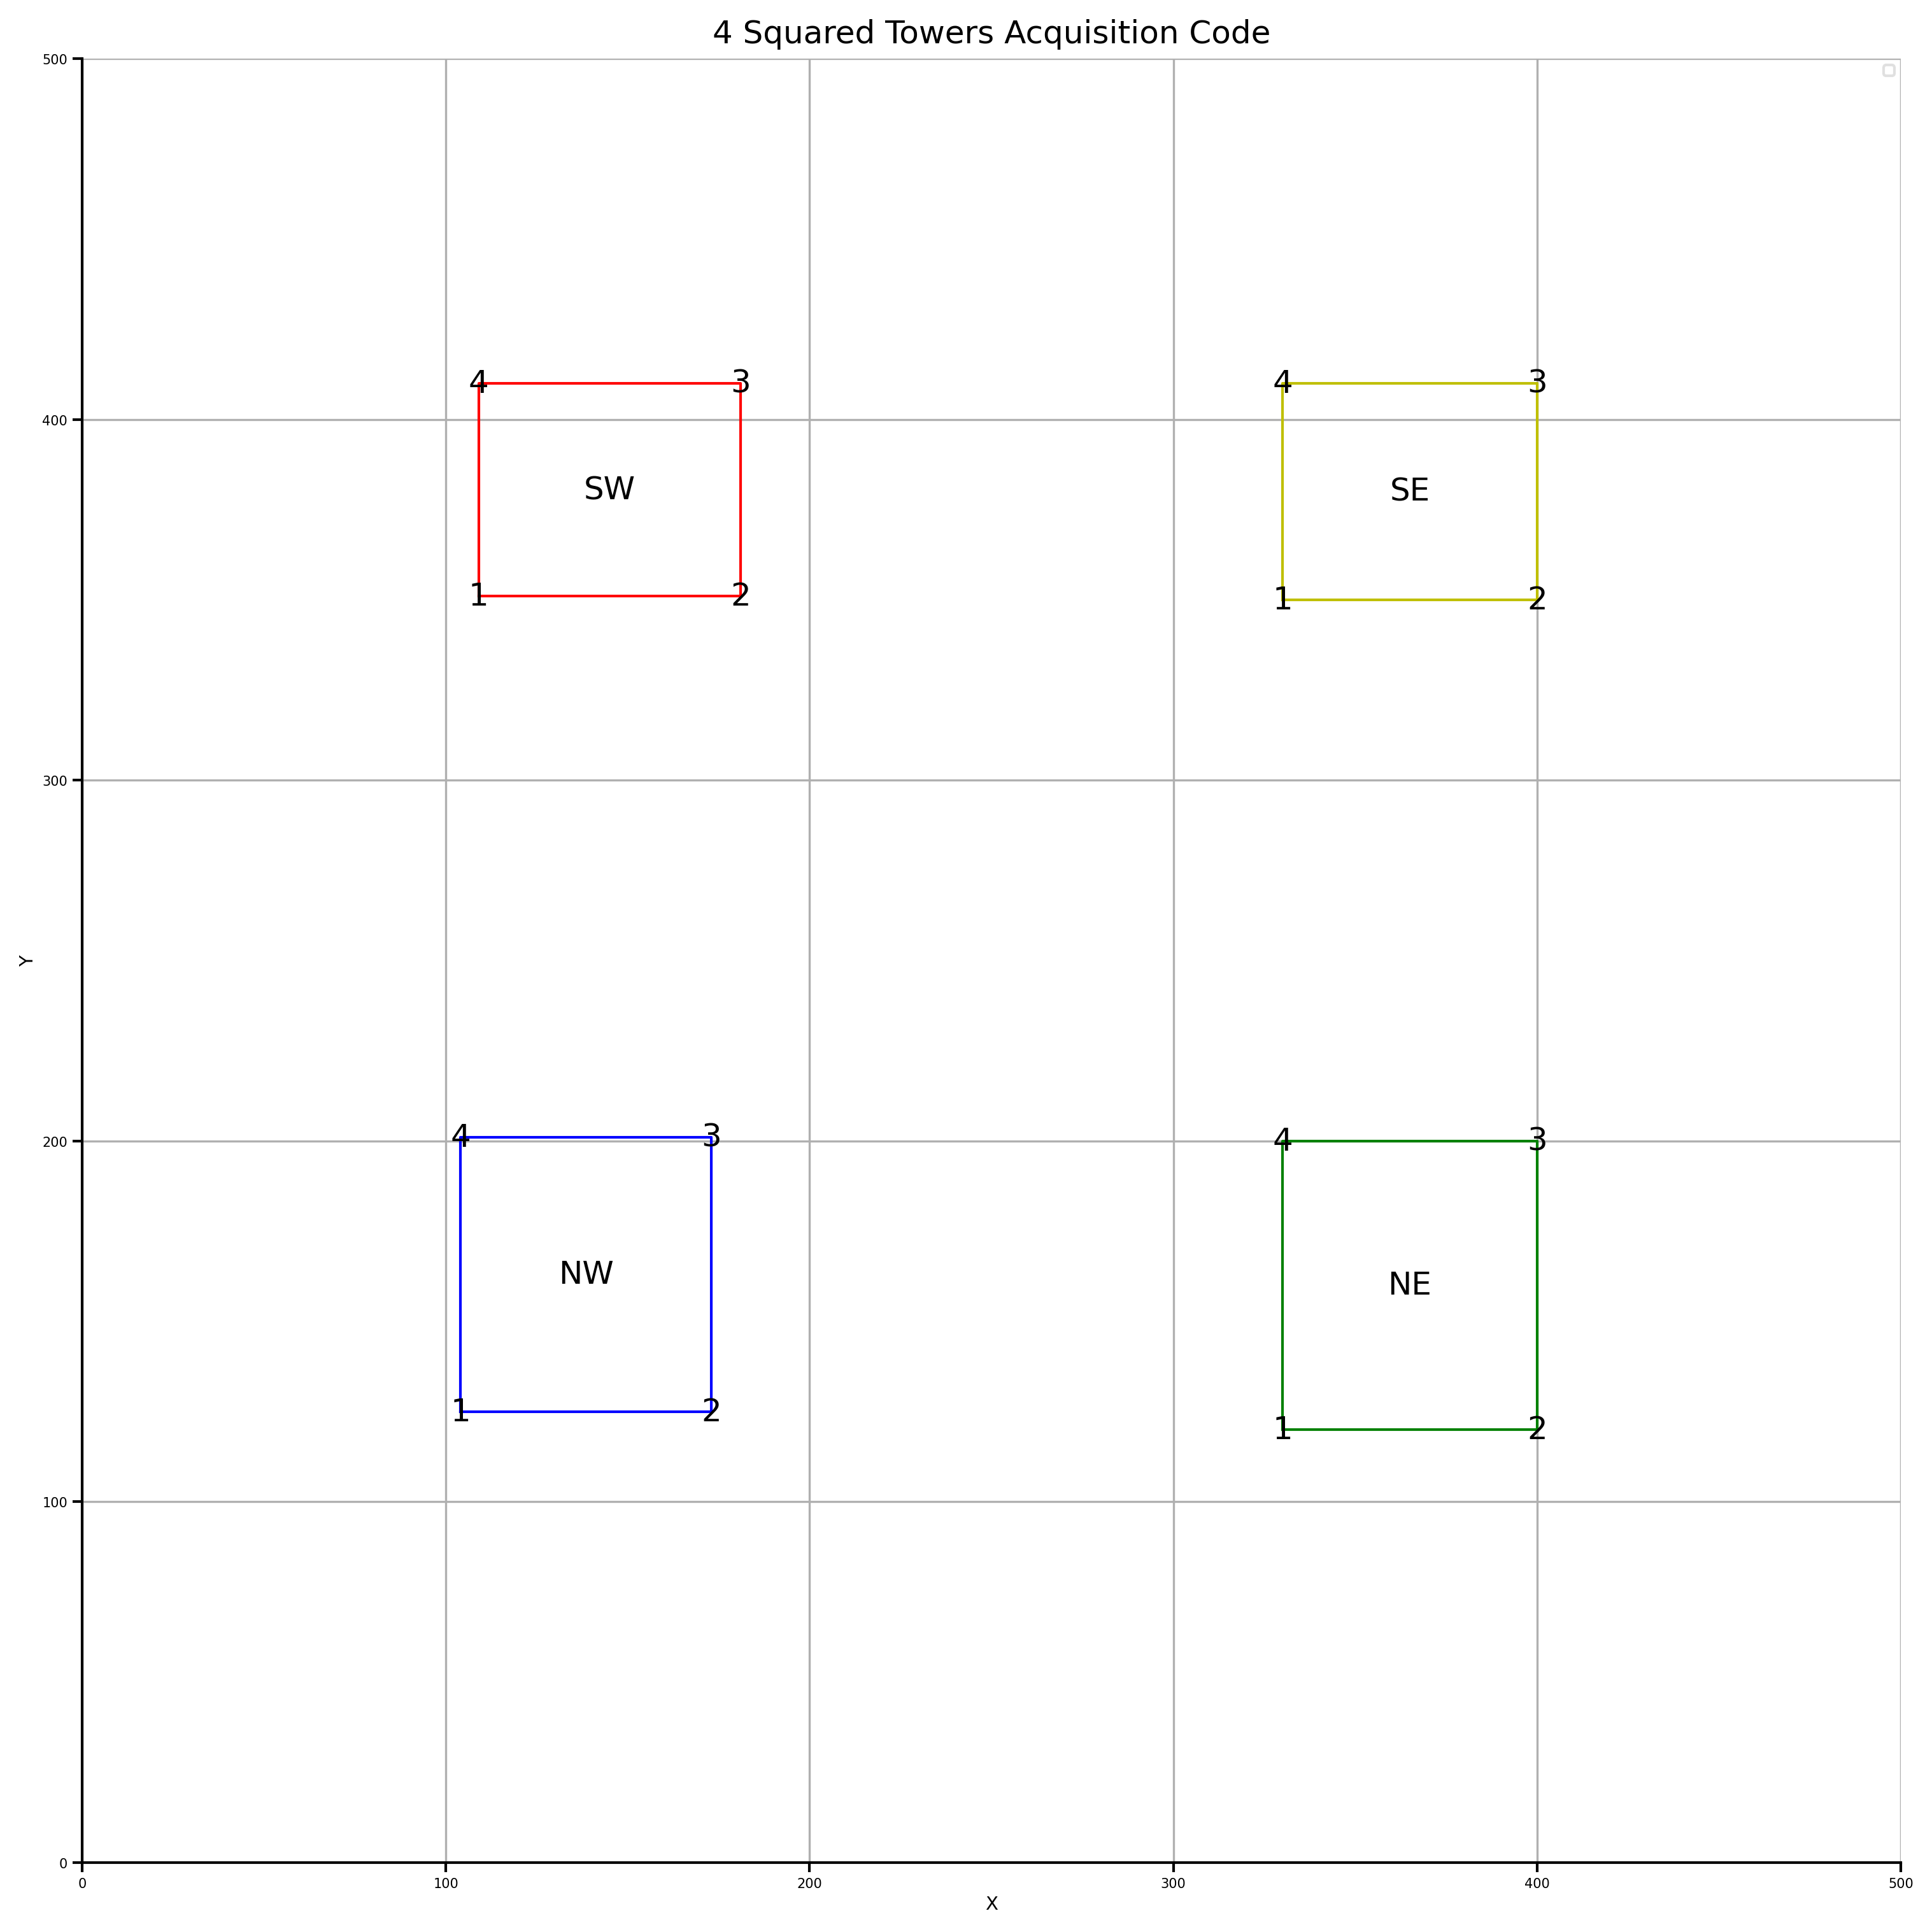

In [9]:
# Function to draw the edges(countour) of towers (or trapeze) based on their vertices(corners) coordiniates
def plot_maze_ROIs(vertices, color, label):
    # Close the square polygon by appending the first vertex to the end
    closed_vertices = vertices + [vertices[0]]
    closed_vertices = list(zip(*closed_vertices))  # Transpose vertices for plotting (x, y)
    plt.plot(closed_vertices[0], closed_vertices[1], color)
    print(label)
    print(vertices)
    # Calculate the center of the square for labeling.
    center_x = sum([v[0] for v in vertices]) / 4
    center_y = sum([v[1] for v in vertices]) / 4
    print(center_x,center_y)
    plt.text(center_x, center_y, label, fontsize=12, ha='center', va='center')

    # Plot the number of each corner at its respective coordinates
    for i, (x, y) in enumerate(vertices):
        plt.text(x, y, str(i+1), fontsize=12, ha='center', va='center', color='black')
    

# Initialize plot
plt.figure(figsize=(10, 10))

# Colors for the towers
colors = {'NW': 'b-', 'NE': 'g-', 'SW': 'r-', 'SE': 'y-'}

# Plot each tower
for tower_name, vertices in towers_coordinates.items():
    plot_maze_ROIs(vertices, colors[tower_name], tower_name)

# Set plot limits and labels
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('4 Squared Towers Acquisition Code')
plt.grid(True)
plt.legend()

# Display plot
plt.show()


In [10]:
# This is the transformation we have to do to get the coordinates right knowing that on open CV they go from 0,0 (upper left origin)  to (0,512), lower left max value
max_y = video_resolution[1]

# Transform the coordinates to have the origin at the lower left
transformed_towers_coordinates = {
    label: [[x, max_y - y] for x, y in vertices]
    for label, vertices in towers_coordinates.items()
}
print(transformed_towers_coordinates)

{'NW': [[104, 387], [173, 387], [173, 311], [104, 311]], 'NE': [[330, 392], [400, 392], [400, 312], [330, 312]], 'SW': [[109, 161], [181, 161], [181, 102], [109, 102]], 'SE': [[330, 162], [400, 162], [400, 102], [330, 102]]}


NW
[[104, 387], [173, 387], [173, 311], [104, 311]]
138.5 349.0
NE
[[330, 392], [400, 392], [400, 312], [330, 312]]
365.0 352.0
SW
[[109, 161], [181, 161], [181, 102], [109, 102]]
145.0 131.5
SE
[[330, 162], [400, 162], [400, 102], [330, 102]]
365.0 132.0


/var/folders/m3/2hk37vnx7xbcrsllbb346xdm0000gn/T/ipykernel_3266/2904222952.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


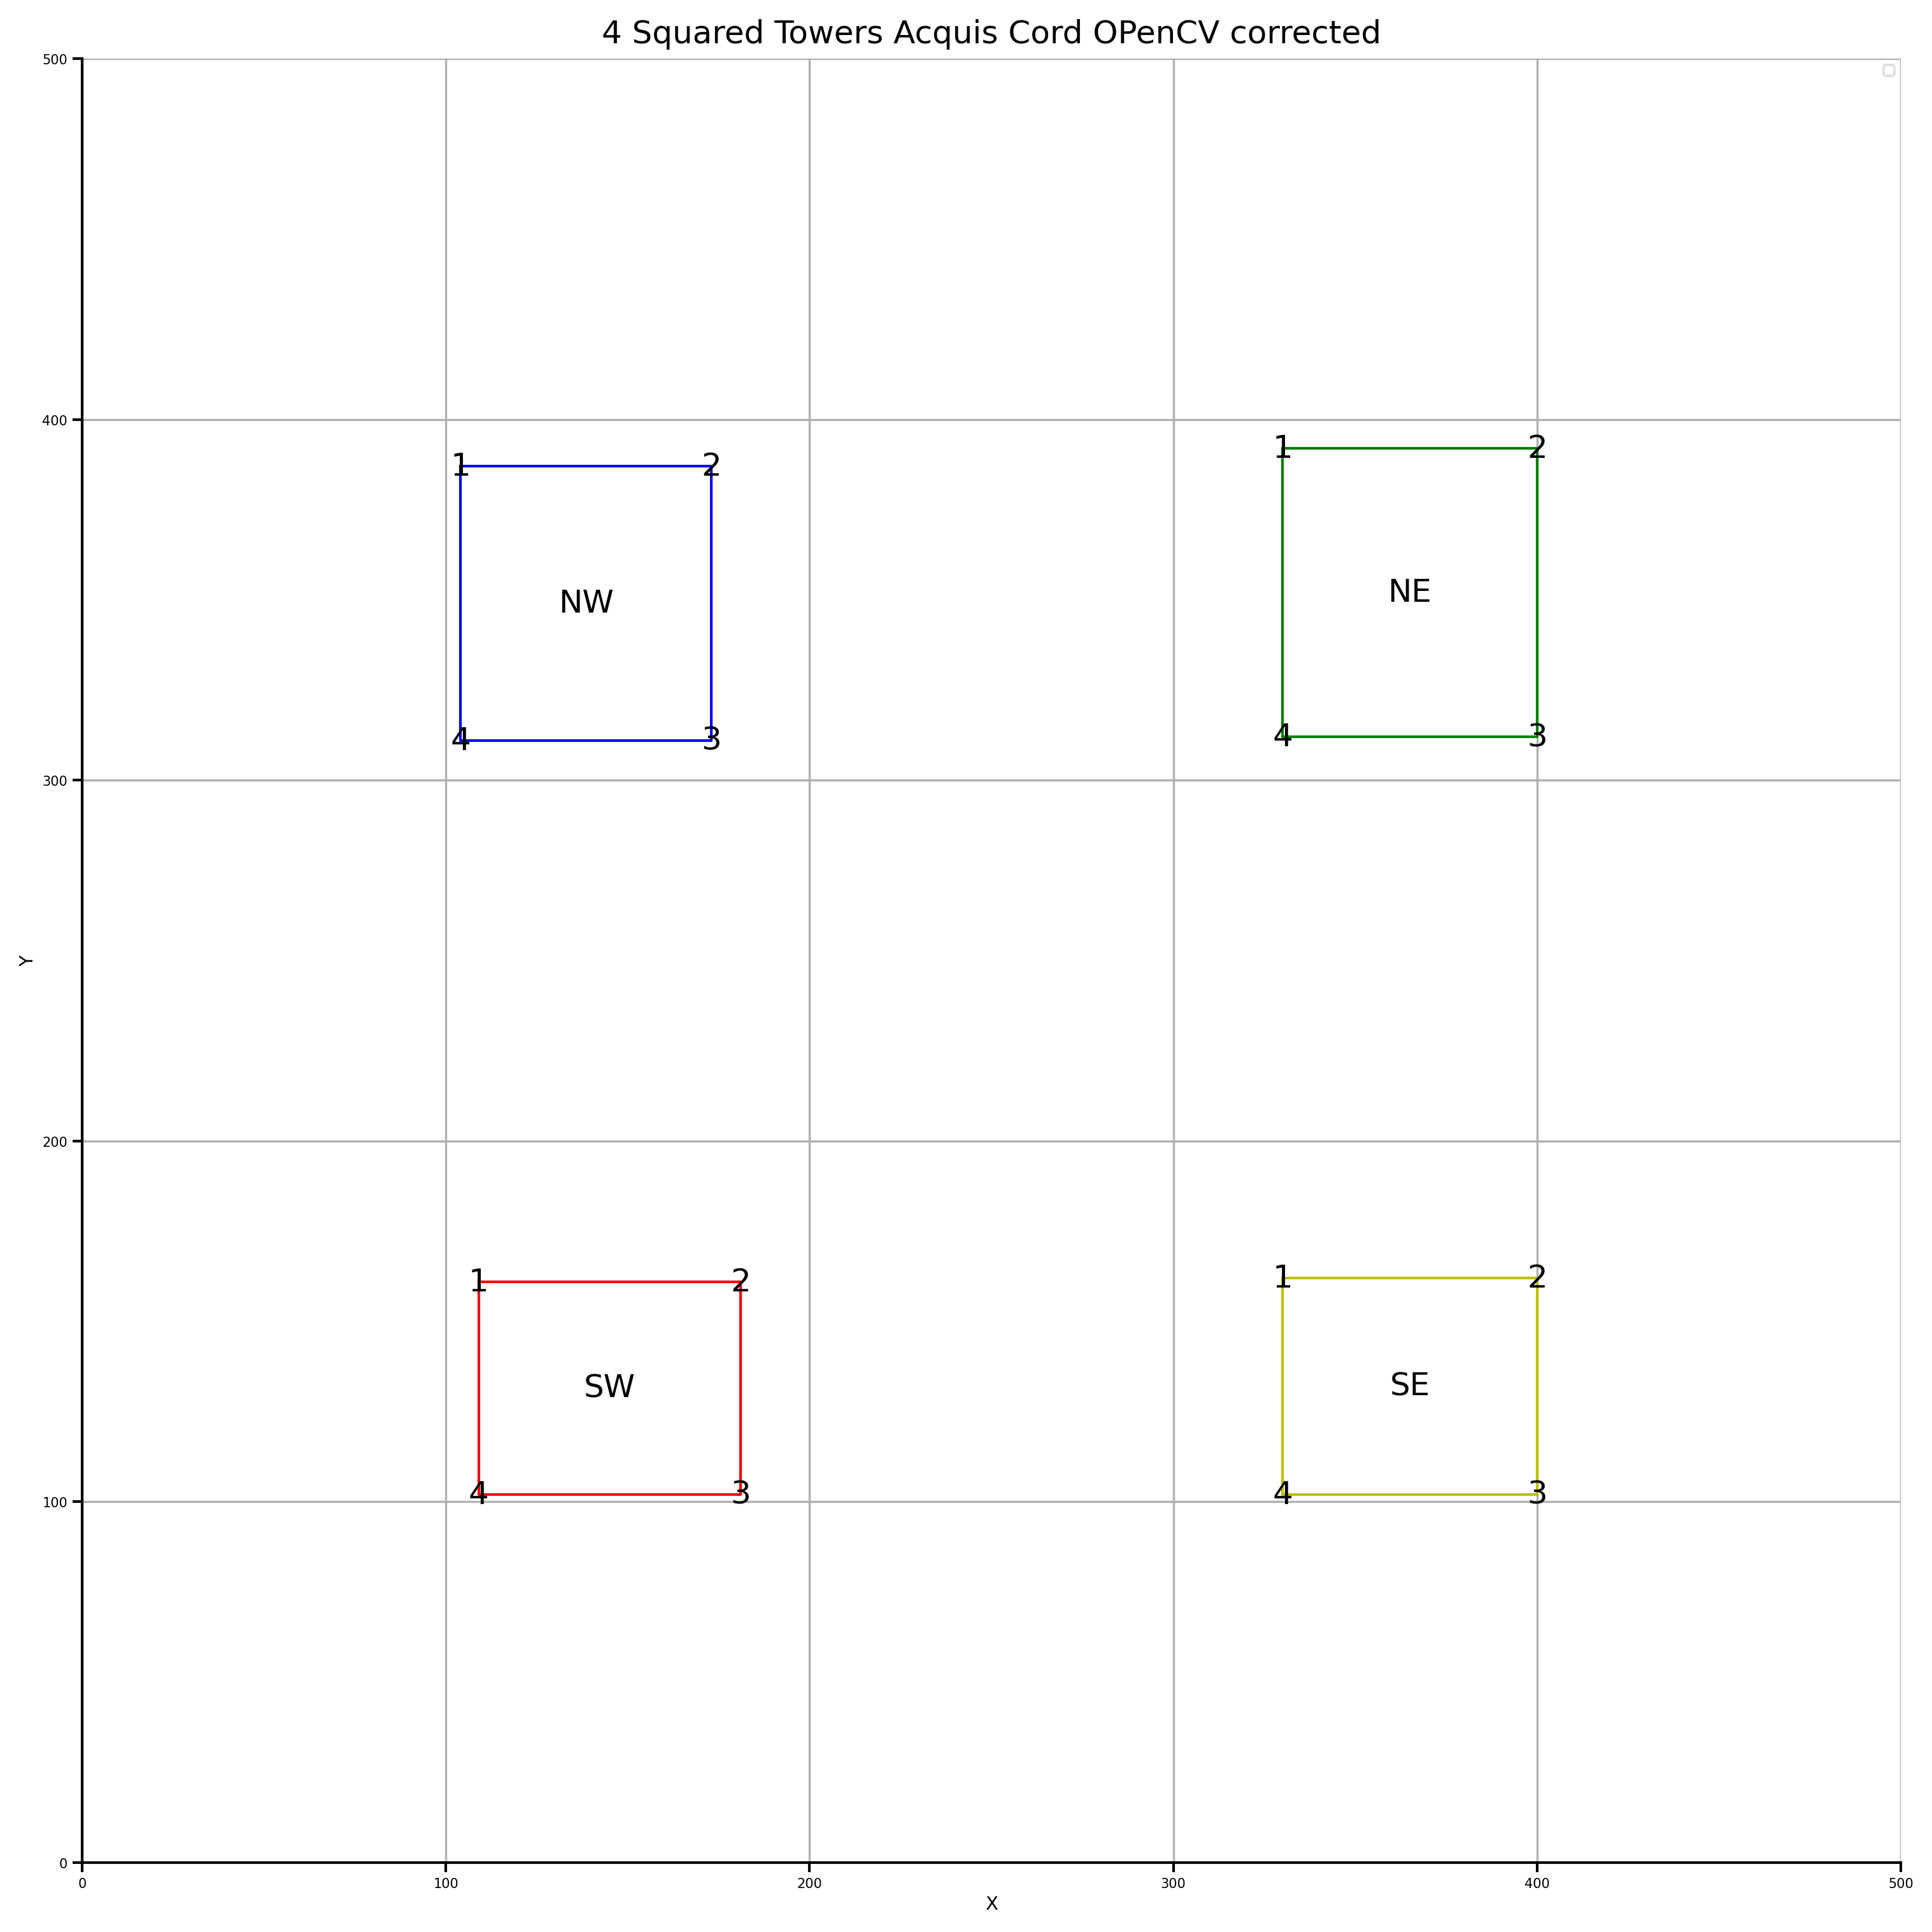

In [11]:
# Initialize plot
plt.figure(figsize=(10, 10))

# Colors for the towers
colors = {'NW': 'b-', 'NE': 'g-', 'SW': 'r-', 'SE': 'y-'}

# Plot each tower
for tower_name, vertices in transformed_towers_coordinates.items():
    plot_maze_ROIs(vertices, colors[tower_name], tower_name)

# Set plot limits and labels
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('4 Squared Towers Acquis Cord OPenCV corrected')
plt.grid(True)
plt.legend()

# Display plot
plt.show()

In [12]:
# now lets do the same with the coordinate in Alice original processing code
#define the coordinates of each patch
video_resolution=512,512
NWpatch_coords = [[104, video_resolution[1] -  125], [173, video_resolution[1] -  125], [173, video_resolution[1] -  201], [104, video_resolution[1] -  201]]
NEpatch_coords = [[330, video_resolution[1] -  120], [400, video_resolution[1] -  120], [400, video_resolution[1] -  200], [330, video_resolution[1] -  200]]
SWpatch_coords = [[109, video_resolution[1] -  351], [181, video_resolution[1] -  351], [181, video_resolution[1] -  410], [109, video_resolution[1] -  410]]
SEpatch_coords = [[330, video_resolution[1] -  350], [400, video_resolution[1] -  350], [400, video_resolution[1] -  410], [330, video_resolution[1] -  410]]
towers_coordinates_alice = {
    "NW": NWpatch_coords,
    "NE": NEpatch_coords,
    "SW": SWpatch_coords,
    "SE": SEpatch_coords,
}

#This piece above will be deleted

NW
[[104, 387], [173, 387], [173, 311], [104, 311]]
138.5 349.0
NE
[[330, 392], [400, 392], [400, 312], [330, 312]]
365.0 352.0
SW
[[109, 161], [181, 161], [181, 102], [109, 102]]
145.0 131.5
SE
[[330, 162], [400, 162], [400, 102], [330, 102]]
365.0 132.0


/var/folders/m3/2hk37vnx7xbcrsllbb346xdm0000gn/T/ipykernel_3266/3945003303.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


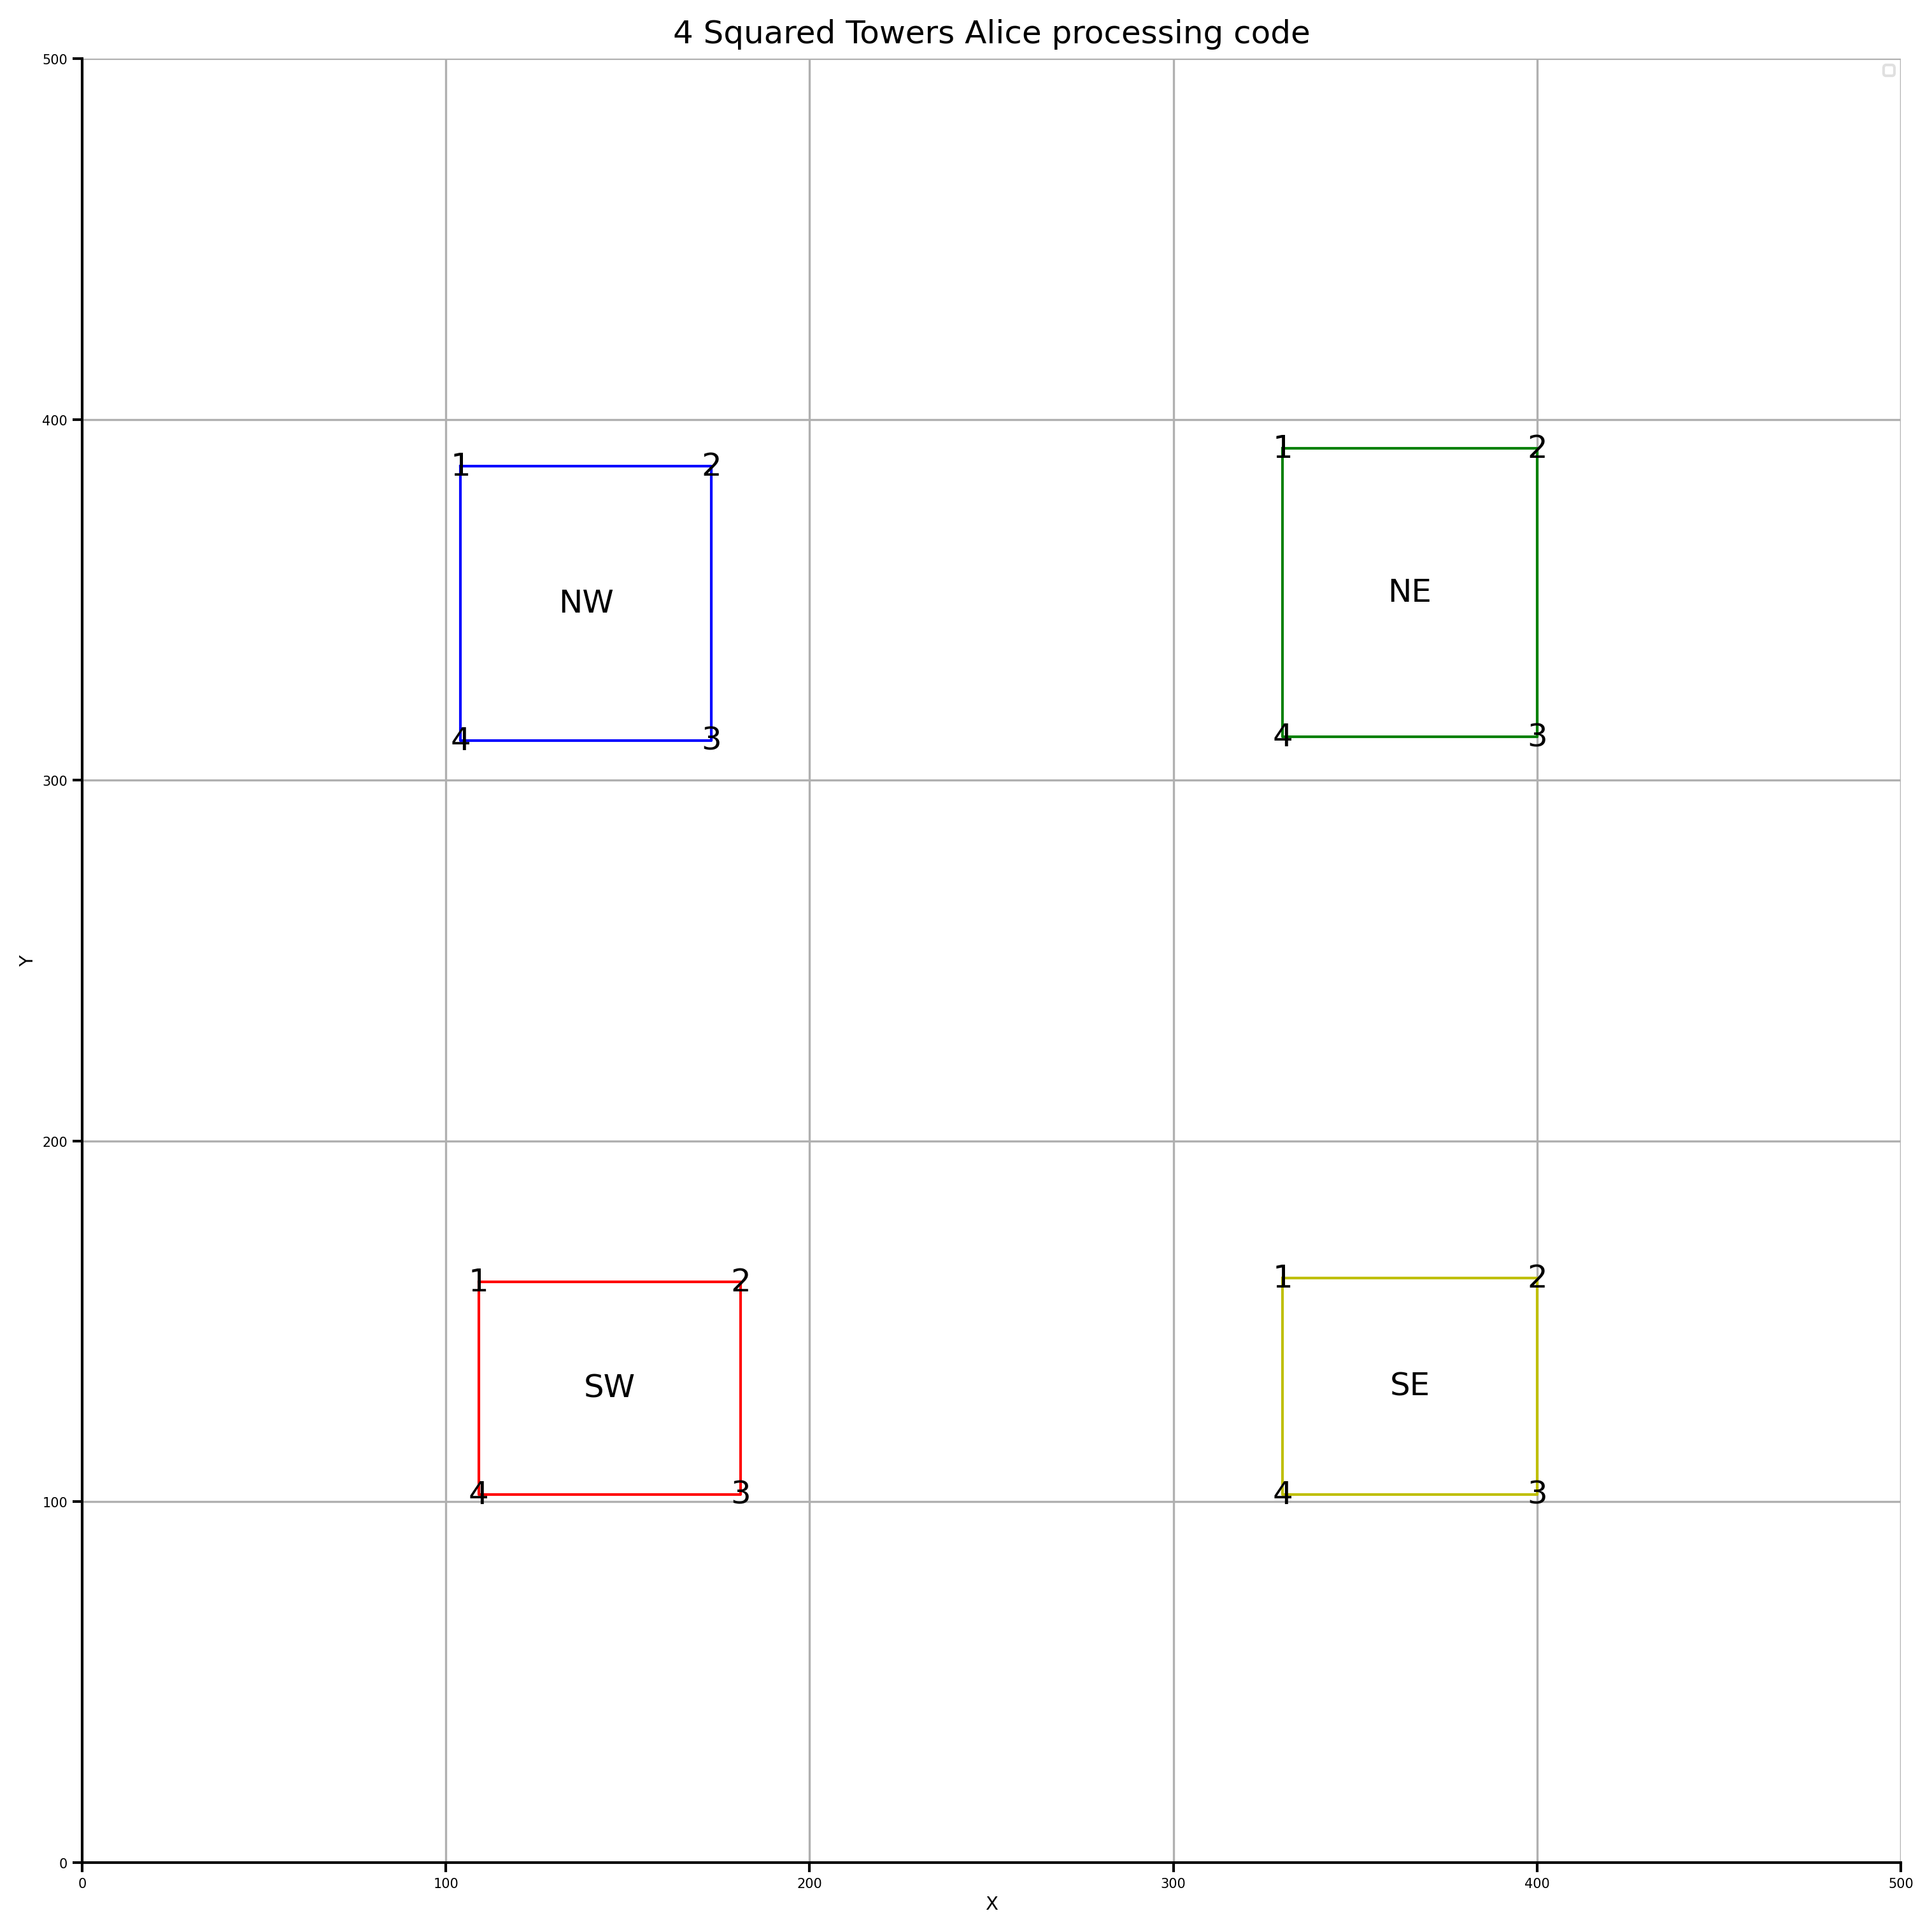

In [13]:
# Initialize plot
plt.figure(figsize=(10, 10))

# Colors for the towers
colors = {'NW': 'b-', 'NE': 'g-', 'SW': 'r-', 'SE': 'y-'}

# Plot each tower
for tower_name, vertices in towers_coordinates_alice.items():
    plot_maze_ROIs(vertices, colors[tower_name], tower_name)

# Set plot limits and labels
plt.xlim(0, 500)
plt.ylim(0, 500)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('4 Squared Towers Alice processing code')
plt.grid(True)
plt.legend()

# Display plot
plt.show()

{'NW': {'N': [[104, 387], [173, 387], [223, 437], [54, 437]], 'E': [[173, 387], [173, 311], [223, 261], [223, 437]], 'S': [[173, 311], [104, 311], [54, 261], [223, 261]], 'W': [[104, 311], [104, 387], [54, 437], [54, 261]]}, 'NE': {'N': [[330, 392], [400, 392], [450, 442], [280, 442]], 'E': [[400, 392], [400, 312], [450, 262], [450, 442]], 'S': [[400, 312], [330, 312], [280, 262], [450, 262]], 'W': [[330, 312], [330, 392], [280, 442], [280, 262]]}, 'SW': {'N': [[109, 161], [181, 161], [231, 211], [59, 211]], 'E': [[181, 161], [181, 102], [231, 52], [231, 211]], 'S': [[181, 102], [109, 102], [59, 52], [231, 52]], 'W': [[109, 102], [109, 161], [59, 211], [59, 52]]}, 'SE': {'N': [[330, 162], [400, 162], [450, 212], [280, 212]], 'E': [[400, 162], [400, 102], [450, 52], [450, 212]], 'S': [[400, 102], [330, 102], [280, 52], [450, 52]], 'W': [[330, 102], [330, 162], [280, 212], [280, 52]]}}
NW
[[104, 387], [173, 387], [173, 311], [104, 311]]
138.5 349.0
NW N
[[104, 387], [173, 387], [223, 437

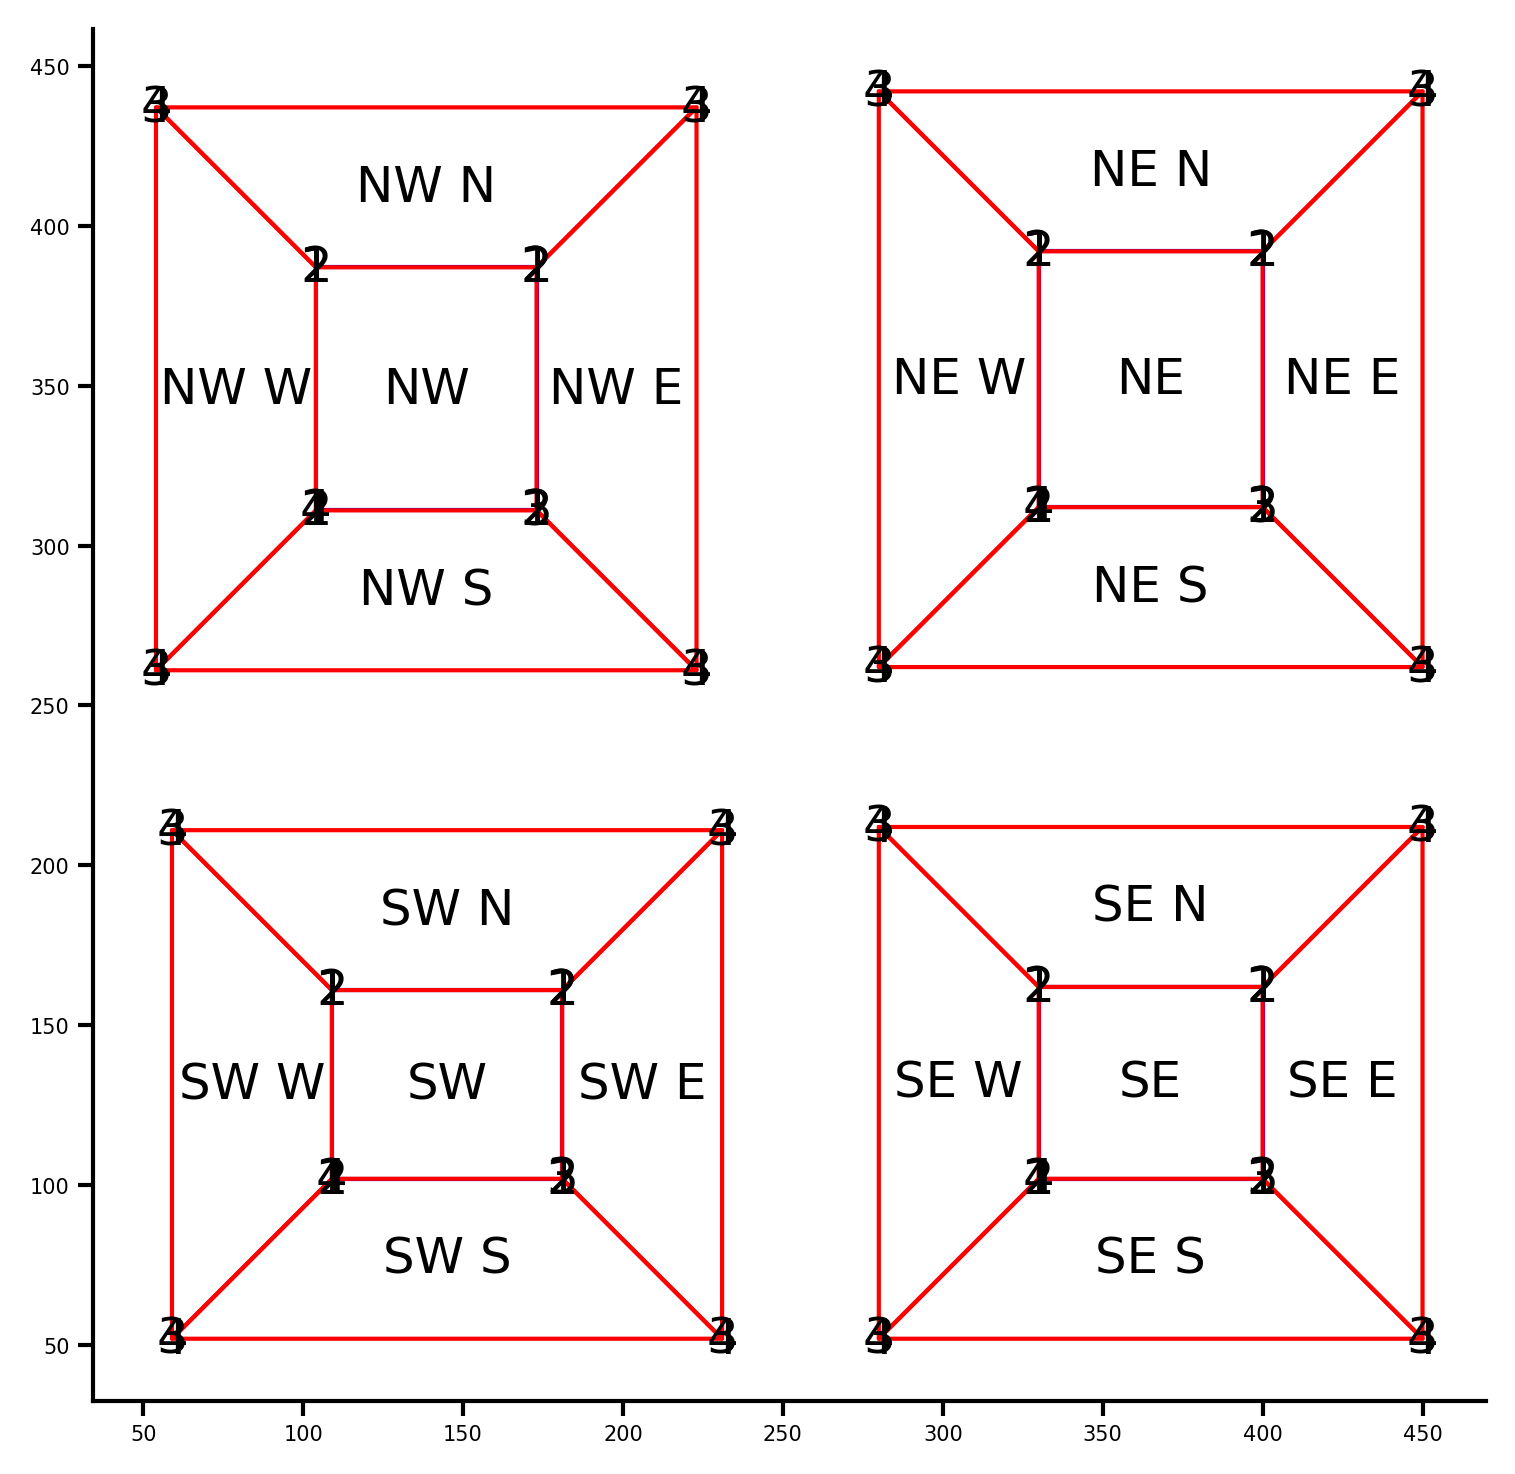

In [14]:
#Now let's draw the trapeze around the tower, knowing their width and the transformed_towers_coordinates


trapeze_width = 50 



def trapeze_coordinates_from_tower(tower_coordinates, trapeze_width):
    """
    generate the trapezes coordinates surrounding a tower
    inputs:
    tower_coordinates - coordinates of the 4 corners of a tower [[Xa, Ya], [Xb, Yb], [Xc, Yc], [Xd, Yd]]
    trapeze_width - width of the trapeze in pixels
    outputs:
    coordinates [[Xa, Ya], [Xb, Yb], [Xc, Yc], [Xd, Yd]] for the 4 trapezes (N, E, S, W).
    
    
    """

    trapeze_N = [tower_coordinates[0], tower_coordinates[1], [tower_coordinates[1][0]+trapeze_width, tower_coordinates[1][1]+trapeze_width], [tower_coordinates[0][0]-trapeze_width, tower_coordinates[0][1]+trapeze_width]]
    trapeze_E = [tower_coordinates[1], tower_coordinates[2], [tower_coordinates[2][0]+trapeze_width, tower_coordinates[2][1]-trapeze_width], [tower_coordinates[1][0]+trapeze_width, tower_coordinates[1][1]+trapeze_width]]
    trapeze_S = [tower_coordinates[2], tower_coordinates[3], [tower_coordinates[3][0]-trapeze_width, tower_coordinates[3][1]-trapeze_width], [tower_coordinates[2][0]+trapeze_width, tower_coordinates[2][1]-trapeze_width]]
    trapeze_W = [tower_coordinates[3], tower_coordinates[0], [tower_coordinates[0][0]-trapeze_width, tower_coordinates[0][1]+trapeze_width], [tower_coordinates[3][0]-trapeze_width, tower_coordinates[3][1]-trapeze_width]]
    return trapeze_N, trapeze_E, trapeze_S, trapeze_W


    # N = [patch[0], patch[1], [patch[1][0]+width, patch[1][1]+width], [patch[0][0]-width, patch[0][1]+width]]
    # E = [patch[1], patch[2], [patch[2][0]+width, patch[2][1]-width], [patch[1][0]+width, patch[1][1]+width]]
    # S = [patch[2], patch[3], [patch[3][0]-width, patch[3][1]-width], [patch[2][0]+width, patch[2][1]-width]]
    # W = [patch[3], patch[0], [patch[0][0]-width, patch[0][1]+width], [patch[3][0]-width, patch[3][1]-width]]
    # return N, E, S, W



# Initialize dictionary to store trapeze coordinates
all_trapezes_coordinates = {"NW": {}, "NE": {}, "SW": {}, "SE": {}}

# Iterate over each tower and compute trapeze coordinates
for tower_name, tower_coordinates in transformed_towers_coordinates.items():
    all_trapezes_coordinates[tower_name]["N"], \
    all_trapezes_coordinates[tower_name]["E"], \
    all_trapezes_coordinates[tower_name]["S"], \
    all_trapezes_coordinates[tower_name]["W"] = trapeze_coordinates_from_tower(tower_coordinates, trapeze_width)


print(all_trapezes_coordinates)

# Plot each transformed tower and its trapezes
for label, vertices in transformed_towers_coordinates.items():
    plot_maze_ROIs(vertices, 'blue', label)
    for direction, trapeze in all_trapezes_coordinates[label].items():
        plot_maze_ROIs(trapeze, 'red', f'{label} {direction}')

# Display the plot
plt.gca().set_aspect('equal', adjustable='box')
plt.show()



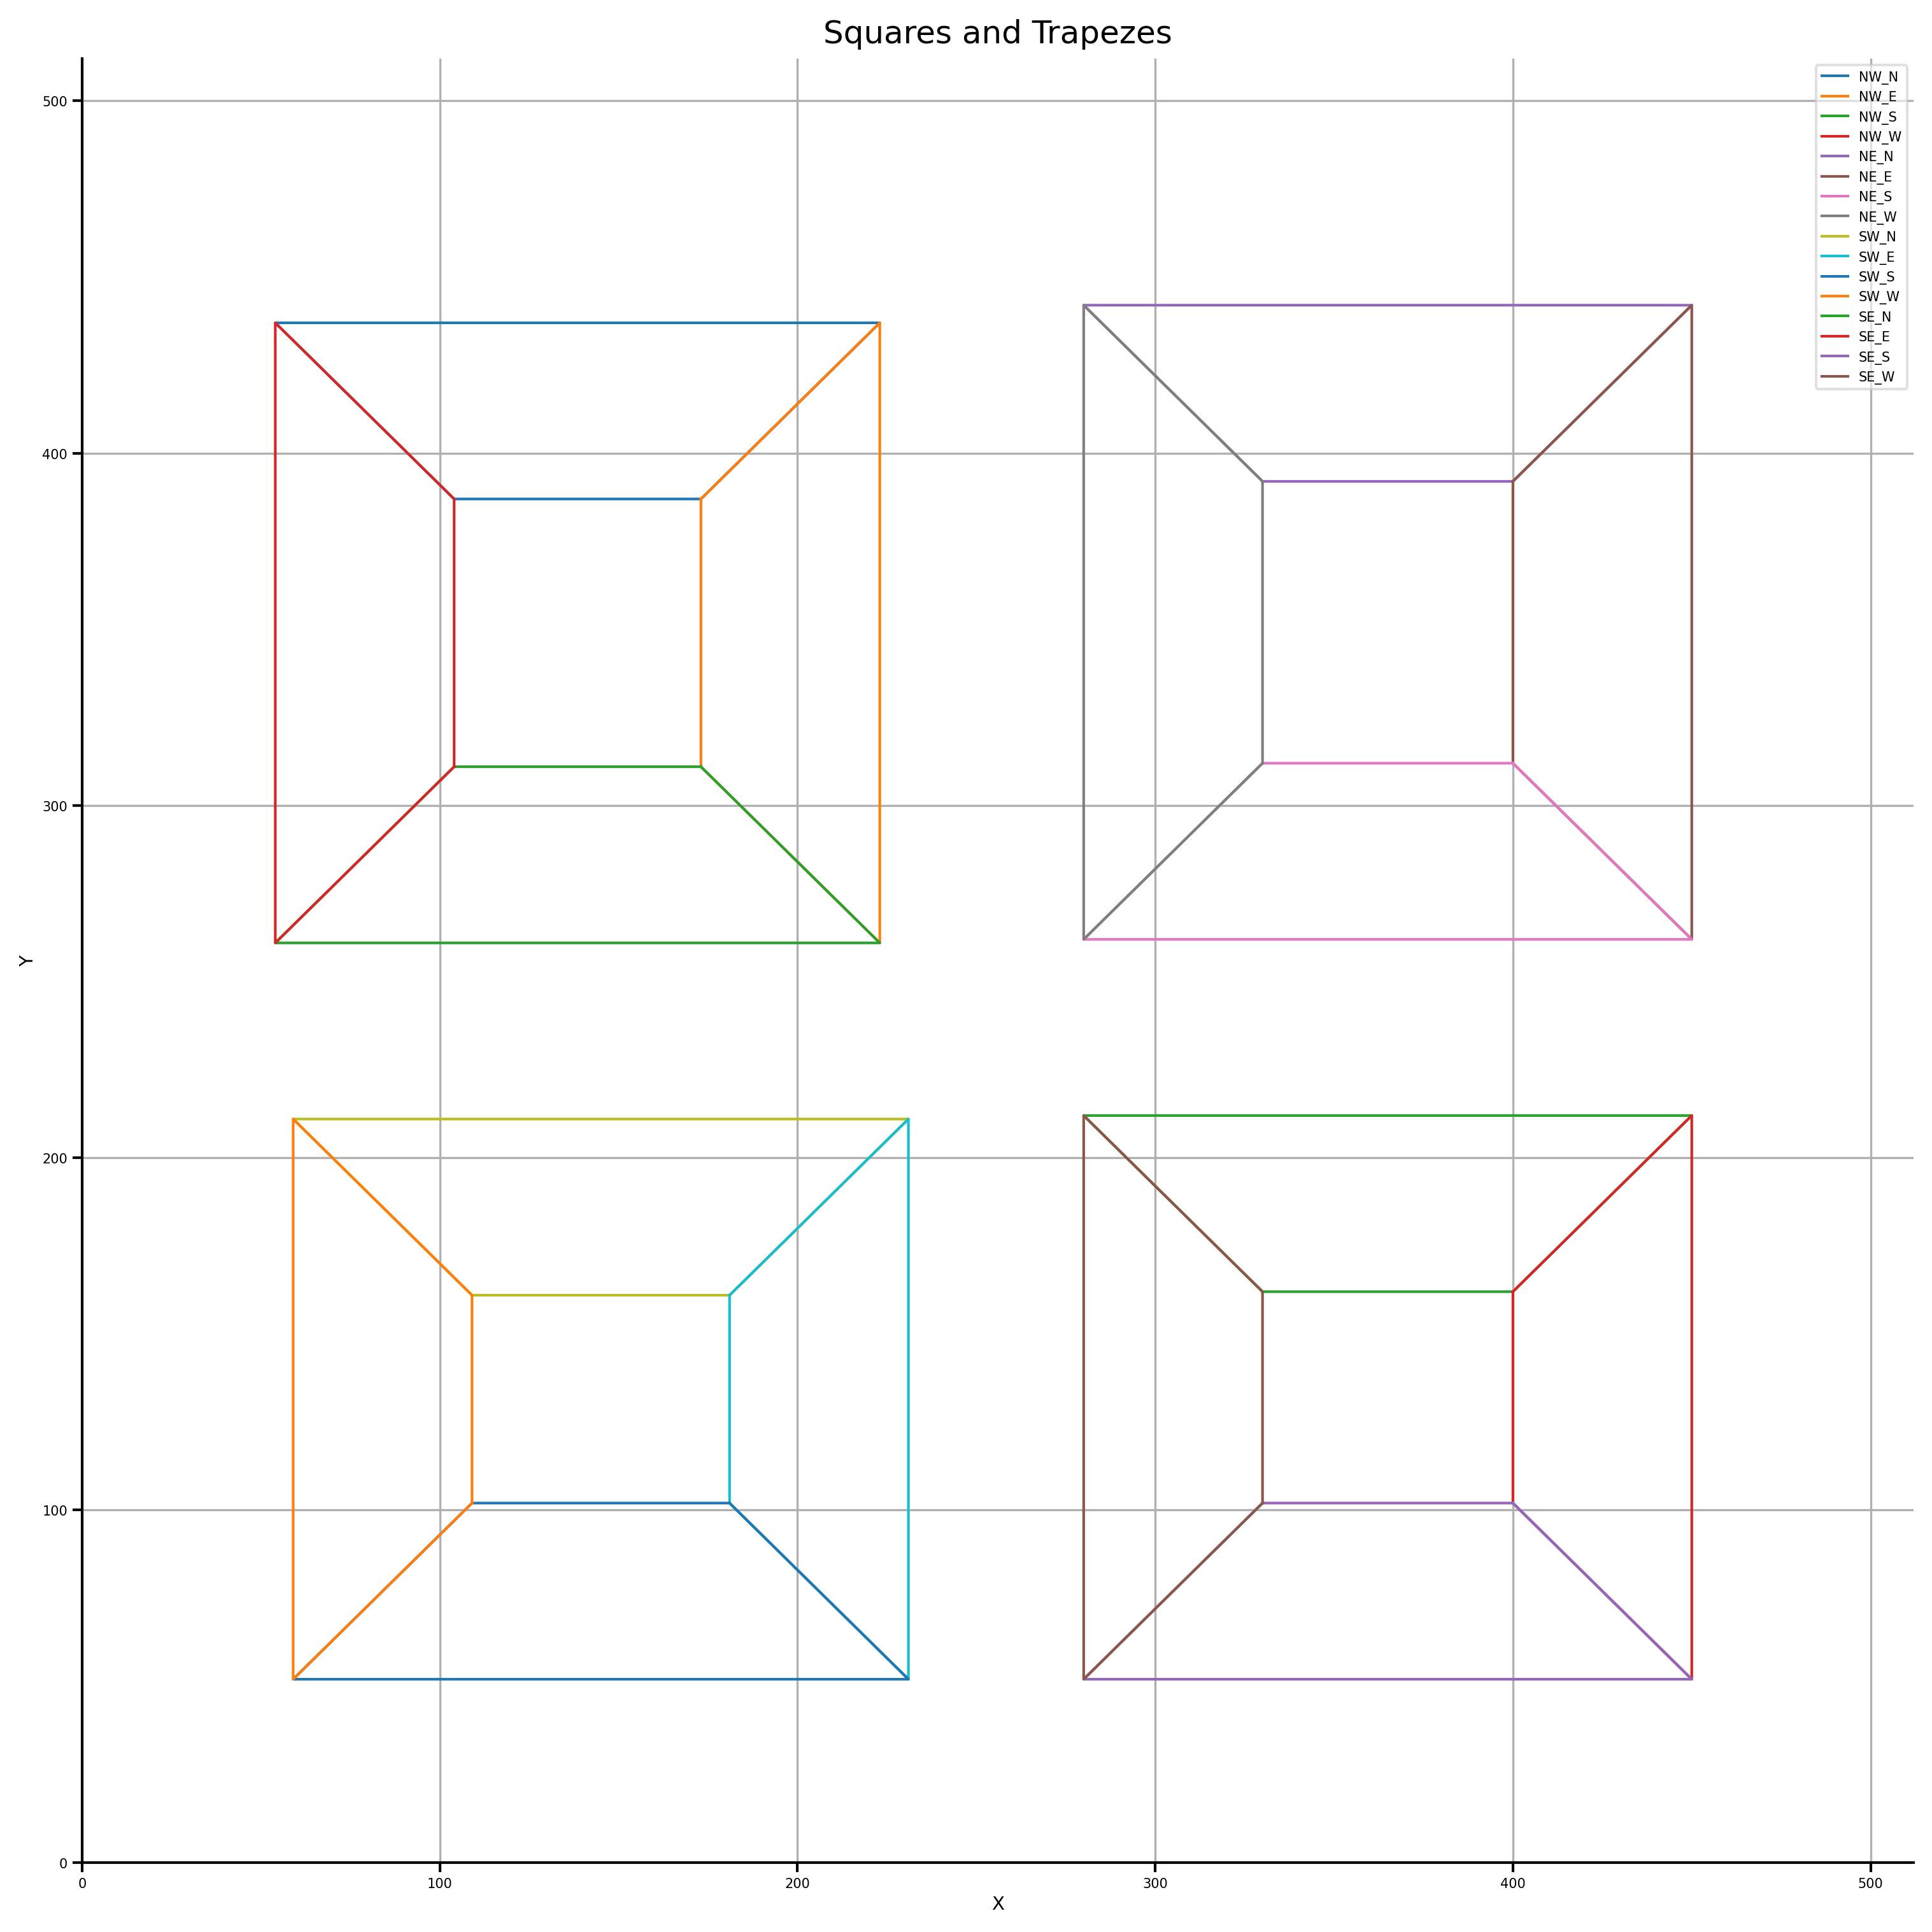

In [15]:
# Initialize plot
plt.figure(figsize=(10, 10))

# Plot each square and trapeze
for tower, trapezes in all_trapezes_coordinates.items():
    for trapeze, coordinates in trapezes.items():
        # Close the polygon by appending the first vertex
        coordinates.append(coordinates[0])
        # Extract x and y coordinates for plotting
        x_coords, y_coords = zip(*coordinates)
        plt.plot(x_coords, y_coords, label=f'{tower}_{trapeze}')

# Set plot limits and labels
plt.xlim(0, 512)
plt.ylim(0, 512)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Squares and Trapezes')
plt.grid(True)
plt.legend()

# Show plot
plt.show()

### now we're going to go through the processing of the trajectory.
#### first cutting the trajectory in epochs of continuous running.

In [16]:
# we load the trajectory , turn info and parametres info from the csv files
traj_df, turns_df, param_df=load_data(illustration_mouse_folder_path,illustration_foragiong_session)

# correct for some open CV flipping
smooth_sigma = 1 #the sigma used for the remaining of the analysis for smoothing
traject_time = traj_df['time'].to_numpy()
xpositions = traj_df['xposition'].to_numpy()
ypositions = traj_df['yposition'].to_numpy()
ypositions = video_resolution[1] - ypositions # yposition is inverted, puts it back in the right way. DAvid: this is not simply an inversion because resolution is added
# smooth positions
smoothed_Xpositions = smooth(xpositions, smooth_sigma)
smoothed_Ypositions = smooth(ypositions, smooth_sigma) # Smoothes the positions with true sigma

#this function compute the distance and speed in cm and cm/s
def compute_distance_and_speed(smoothed_Xpositions, smoothed_Ypositions, traject_time):
    # Calculate the differences between consecutive points
    delta_x = np.diff(smoothed_Xpositions)
    delta_y = np.diff(smoothed_Ypositions)
    delta_t = np.diff(traject_time)
    
    # Compute the distances traveled between each timepoint
    distances = np.sqrt(delta_x**2 + delta_y**2)
    distances=distances*(84/video_resolution[0]) ##convert pixel into cm
    
    # Compute the speeds between each timepoint
    speeds = distances / delta_t
    
    return distances, speeds


distances, speeds = compute_distance_and_speed(smoothed_Xpositions, smoothed_Ypositions, traject_time)

print("Distances:", distances)
print("Speeds:", speeds)



Distances: [7.53995961e-01 1.03442464e+00 1.13601846e+00 ... 7.05145710e-04
 2.19565869e-05 0.00000000e+00]
Speeds: [1.75347898e+01 2.65237086e+01 2.91286784e+01 ... 1.85564661e-02
 5.22775877e-04 0.00000000e+00]


In [71]:
# now lets get the run epcochs

#for this we need some parameters
pause_min_duration = 0.1 #if a stop is shorter than this, merges the two epochs bordering it
run_min_duration = 0.3 #minimal duration of an epoch to be considerd
cut_off_speed = 7 # this value is the speed in cm/s. It is used to detect when the animals stop running. 

trajectory_speeds = np.insert(speeds, 0, 0) # insert a 0 to avoid length error with trajectory times. We consider that
                                            # at the first frame the speed is null

def define_run_epochs(cut_off_speed, trajectory_speeds, trajectory_times, pause_min_duration, run_min_duration):
    """
    Corrected by David
    Identifies continuous epochs during which the mouse is moving above a certain speed (cut_off_speed).
    A minimal duration of low speed is necessary to be considered as the end of a run.
    Similarly, a minimal duration of high speed is necessary to be considered as a run.
    """
    run_epochs = []
    is_in_epoch = False  # Flag to track if we are currently in a running epoch
    epoch_start_index = 0

    if len(trajectory_speeds) != len(trajectory_times):
        raise ValueError("trajectory_speeds and trajectory_times have different lengths")

    for i in range(len(trajectory_speeds)):
        if trajectory_speeds[i] >= cut_off_speed:  # Speed above cut-off value
            if not is_in_epoch: # if the previous trajectory speed was not part of running epoch then this will be a start of a new epoch
                epoch_start_index = i  # Mark the beginning of a new epoch
                is_in_epoch = True
        else: # the speed of the current data point is below the treshold
            if is_in_epoch: # if we were in a run epoch just before (1st point below the treshold)
                # Check first if the pause between this epoch's starting point (trajectory_times[epoch_start_index]) and  
                # the previous epoch' last point trajectory_times[run_epochs[-1][1]] is shorter than the minimal time for a pause
                # then the previous epoch  should be extended to the previous data point.  
                if run_epochs and (trajectory_times[epoch_start_index] - trajectory_times[run_epochs[-1][1]] < pause_min_duration):
                    run_epochs[-1][1] = i - 1  # Extend the previous epoch
                else: # the pause has been long enough then we terminate the run epoch  other previous 
                    run_epochs.append([epoch_start_index, i - 1])  # Add new epoch
                is_in_epoch = False

    # Final check for any epoch still in progress
    if is_in_epoch:
        if run_epochs and (trajectory_times[epoch_start_index] - trajectory_times[run_epochs[-1][1]] < pause_min_duration):
            run_epochs[-1][1] = len(trajectory_speeds) - 1
        elif (trajectory_times[-1] - trajectory_times[epoch_start_index]) >= run_min_duration:
            run_epochs.append([epoch_start_index, len(trajectory_speeds) - 1])

    # Remove epochs that are too short
    run_epochs = [epoch for epoch in run_epochs if (trajectory_times[epoch[1]] - trajectory_times[epoch[0]]) >= run_min_duration]
    
    # Adjust the start and end of each epoch based on acceleration. The idea is that with the threshold method we miss the beginning and enf of the run
    # for the starting point. We are going back and find the point at wich the animal acceleration is less than 40% 
    # than the acceleration at the moment at which he passed the treshold. 
    clean_run_epochs = [None] * len(run_epochs)
    for index,epoch in enumerate(run_epochs):
        clean_run_epochs[index] = epoch.copy()
        epoch_start, epoch_end = epoch[0], epoch[1]
        # Adjust the start of the epoch
        current_point = epoch_start
        acceleration_at_crossing=(trajectory_speeds[current_point + 1] - trajectory_speeds[current_point]) / (trajectory_times[current_point + 1] - trajectory_times[current_point])
        while current_point > 0:
            previous_acceleration = (trajectory_speeds[current_point] - trajectory_speeds[current_point - 1]) / (trajectory_times[current_point] - trajectory_times[current_point - 1])
            if previous_acceleration <= (0.1 * acceleration_at_crossing) or previous_acceleration <= 0:
                break
            current_point -= 1
            #print(f'it went backward on epoch {index}')
        clean_run_epochs[index][0] = current_point

    #Adjust the end of the epoch
    #We are going forward after the speed crossed downward the speed threshold and find the point at wich the animal acceleration is less than 40% 
    #than the acceleration at the moment at which it passed the treshold. 
        current_point = epoch_end
        acceleration_at_crossing=(trajectory_speeds[current_point - 1] - trajectory_speeds[current_point]) / (trajectory_times[current_point] - trajectory_times[current_point-1])
        while current_point < len(trajectory_speeds) - 1:
            next_acceleration = (trajectory_speeds[current_point] - trajectory_speeds[current_point + 1]) / (trajectory_times[current_point+1] - trajectory_times[current_point])
            if next_acceleration <= (0.1 * acceleration_at_crossing) or next_acceleration <= 0:
                break
            current_point += 1
            #print(f'it went forward on epoch {index}')
        clean_run_epochs[index][1] = current_point

    
   
    return clean_run_epochs,run_epochs


In [72]:
clean_run_epochs,run_epochs = define_run_epochs(cut_off_speed= cut_off_speed, trajectory_speeds = trajectory_speeds, trajectory_times=  traject_time, pause_min_duration= pause_min_duration,
                                     run_min_duration= run_min_duration)

In [75]:
def plot_trajectory_chunk(x, y, traject_time,trajectory_speeds, run_epochs, clean_run_epochs, cut_off_speed,events_list=None):
    """
    Plots a chunk of trajectory_speeds from index x to index y and visualizes the run_epochs and clean_run_epochs.
    
    Parameters:
        x (int): Start index of the chunk to plot.
        y (int): End index of the chunk to plot.
        trajectory_speeds (list): List of trajectory speeds.
        run_epochs (list): List of original run epochs.
        clean_run_epochs (list): List of adjusted run epochs.
        cut_off_speed (float): The speed threshold for determining run epochs.
    """
    
    plt.figure(figsize=(14, 8))
    
    # Plot trajectory speeds
    plt.plot(range(x, y), trajectory_speeds[x:y], label='Trajectory Speeds', color='blue', marker='o', markerfacecolor='none')
    
    # Plot horizontal line for cut_off_speed
    plt.axhline(y=cut_off_speed, color='orange', linestyle='--', label='Cut-off Speed')
    
    # Plot original run epochs
    for epoch in run_epochs:
        epoch_start, epoch_end = epoch[0], epoch[1]
        if epoch_start >= x and epoch_end <= y:
            plt.axvspan(epoch_start, epoch_end, color='red', alpha=0.3, label='Original Run Epoch' if epoch == run_epochs[0] else "")
    
    # Plot adjusted run epochs
    for epoch in clean_run_epochs:
        epoch_start, epoch_end = epoch[0], epoch[1]
        if epoch_start >= x and epoch_end <= y:
            plt.axvspan(epoch_start, epoch_end, color='green', alpha=0.3, label='Adjusted Run Epoch' if epoch == clean_run_epochs[0] else "")
    
    # plot optinal events
    if events_list is not None:
        for event in events_list:
            event_index = np.where(traject_time == event)[0]
            plt.axvline(x=event_index, color='m', linestyle='--', label='Event')

    
    
    plt.ylim(bottom=-5,top=70)
    plt.xlabel('Index')
    plt.ylabel('Speed')
    plt.title('Trajectory Speeds with Run Epochs Highlighted')
    plt.legend()
    plt.show()


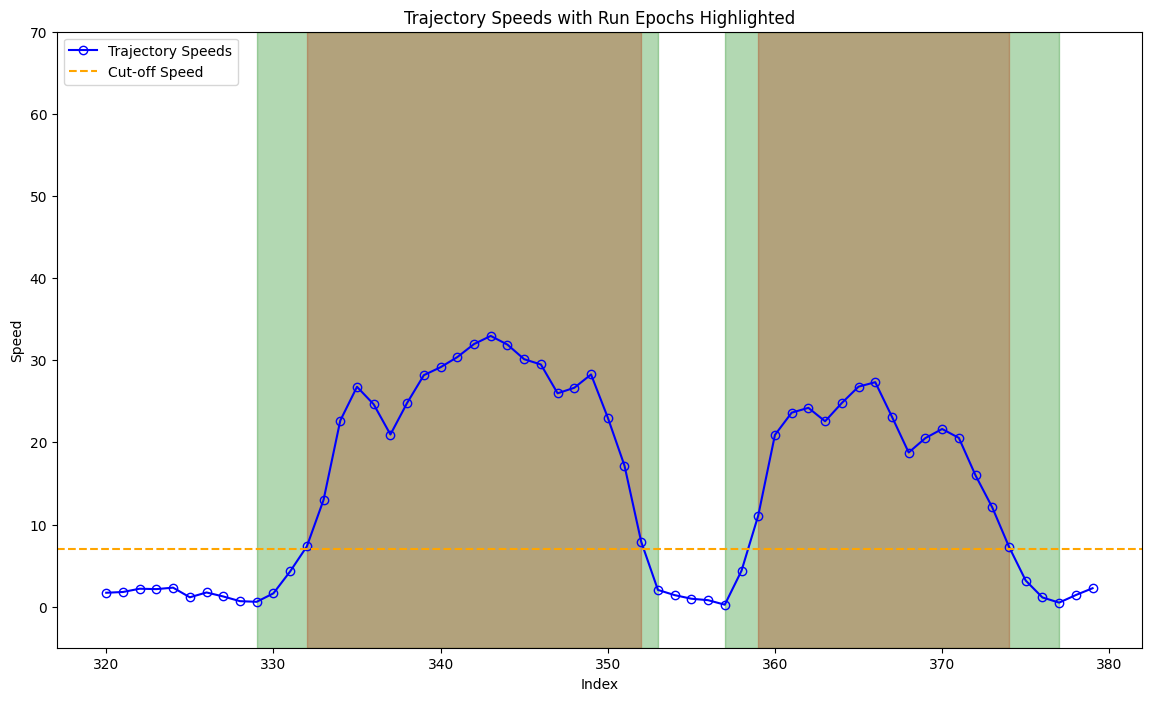

In [76]:
plot_trajectory_chunk(320, 380, traject_time, trajectory_speeds, run_epochs, clean_run_epochs,cut_off_speed=7)

Is the point inside the polygon? True


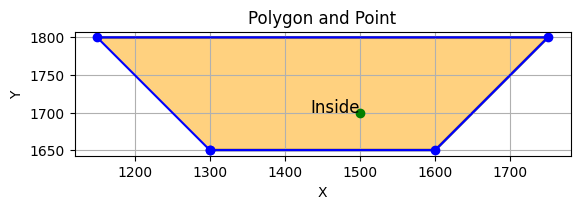

In [85]:



def is_point_in_polygon(polygon_vertices, point): # function to replace the not so efficient one points_in_polygon written originally (not by Alice :)
    """
    Determine if a point is inside or outside a polygon.

    Args:
    - polygon_vertices: Coordinates of the polygon vertices [[Xa, Ya], [Xb, Yb], [Xc, Yc], [Xd, Yd]]
    - point: Coordinates of the point to check [x, y]

    Returns:
    - bool: True if the point is inside the polygon, False otherwise
    """
    path = Path(polygon_vertices)
    return path.contains_point(point)

def plot_polygon_and_point(polygon_vertices, point):
    """
    Plot a polygon and a point, and indicate if the point is inside or outside the polygon.

    Args:
    - polygon_vertices: Coordinates of the polygon vertices [[Xa, Ya], [Xb, Yb], [Xc, Yc], [Xd, Yd]]
    - point: Coordinates of the point to plot [x, y]
    """
    fig, ax = plt.subplots()
    polygon_path = Path(polygon_vertices)
    patch = patches.PathPatch(polygon_path, facecolor='orange', lw=2, alpha=0.5)
    ax.add_patch(patch)

    # Plot the polygon vertices
    polygon_vertices.append(polygon_vertices[0])  # Close the polygon by appending the first point at the end
    xs, ys = zip(*polygon_vertices)
    ax.plot(xs, ys, 'bo-')

    # Plot the point
    is_inside = is_point_in_polygon(polygon_vertices, point)
    point_color = 'green' if is_inside else 'red'
    ax.plot(point[0], point[1], 'o', color=point_color)
    ax.text(point[0], point[1], 'Inside' if is_inside else 'Outside', fontsize=12, ha='right')

    ax.set_aspect('equal', 'box')
    ax.set_title('Polygon and Point')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

# Example usage:
polygon_vertices = [[1300, 1650], [1600, 1650], [1750, 1800], [1150, 1800]]
point = [1500, 1700]

is_inside = is_point_in_polygon(polygon_vertices, point)
print(f"Is the point inside the polygon? {is_inside}")

plot_polygon_and_point(polygon_vertices, point)


In [ ]:
# old function of alice. No need to run

def analysis_trajectory(time, xgauss, ygauss,
                        collection_trapeze, turns_df,
                        cut_speed, ecart_angle, RESOLUTION, MIN_DURATION_STOP, MIN_DURATION_EPOCH):
    """ Arguments =
    time, xgauss, ygauss:the time of each frame in the TXY csv file and the smoothen positions;
    collection_trapeze:dictionnary with an entry for each patch containing each a dictionnary on their side containing the angles coordinate of the detection trapeze;
    turns_df the dataframe containing the informations of the turnsinfo csv corresponding to the sequence;
    cut_speed: speed under which the mouse is considerd to not be moving;
    ecart_angle: ecart between two frame used to calculate the angle, speed and acceleration;
    RESOLUTION: RESOLUTION of the setup in pixels (the size in m is 0.84. if this change, the code must be updqted manualy);
    MIN_DURATION_STOP: minimal duration accepted for a stop;
    MIN_DURATION_EPOCH: minimal duration considered for a stop

    Output = (all are list)
    distance done between this frame and the last one (in cm);
    speed at the moment corresponding to time_average in cm.s-1;
    time_average time at the moment corresponding to the speed;
    acceleration of the mouse at the time t+1 in cm.s-2;
    direction of the mouse at the moment of time average in degree;
    angular speed at the given time t+1 in degre.s-2;

    list_epoch: list of the epochs under the form  [indice of the first frame of the epoch, indice of the last frame of the epoch, indicator]
    See documentation on indicator for more informations
    """

    # Compute the distance but on the data with the gaussian filter

    distances_gauss = np.array([((((xgauss[i]-xgauss[i-1])**2)+((ygauss[i]-ygauss[i-1])**2))**0.5) for i in range(1,len(ygauss))])
    distances_gauss = np.insert(distances_gauss *(0.84/RESOLUTION[0]), 0, 0)

    # Because the distance is computed using two points, it does no longer correspond to time. 
    # To fix it, the average of the time used to calculate the distance is used
    timebeweenframe = np.insert(np.diff(time), 0, 1) # Get the gap between the frames. Add 1 at the beginning to have a consistant size (any value is possible, it will divide 0)
    # Compute the speed in m/s
    speeds_gauss = np.divide(distances_gauss,timebeweenframe)
    # Get the speed in cm/s and add a speed of 0 at the beginning to keep the same data size
    speeds_gauss = speeds_gauss * 100
    list_epochs = cut_in_epoch_speed(cut_off_speed= cut_speed, speed_values = speeds_gauss, time = time, MINIMAL_DURATION_STOP= MIN_DURATION_STOP,
                                     MINIMAL_DURATION_EPOCH= MIN_DURATION_EPOCH) # Calculate the epochs with the true cut_off speed and store it

    #DAvid: this cut_in_epoch_speed function has been cleaned and does not need to be inside this function
    
    
    # Calculate the orientation with the chosen value and get the changed epochs
    angles = calcul_angle(ycoordinate= ygauss, ecart= ecart_angle, xcoordinate= xgauss)
    time_average = np.array([time[0]]*ecart_angle + [(time[i] + time[i-ecart_angle]) /2 for i in range(ecart_angle, len(time))])

    angles_relatifs = np.insert(np.diff([angles, time_average])[0], obj= 0, values= np.zeros(1 )) # Derive angles regarding time
    angular_speed = [360 + x if x < -180 else -360 + x if x>180 else x for x in angles_relatifs] # Correct for the brutal acceleration when angle pass from -180 to 180

    # Calcul of acceleration
    acceleration = np.insert(np.diff([speeds_gauss, time_average])[0], obj = 0, values= np.zeros(1)) # Derive speed relative to time

    
    #DAvid: thes function to compute acceleration and direction (angle) shoul be cleaned and removed 
    
    #Advance analysis = identify the quarter turns, the trajectory towards and between objetcs
    #format of a quarter turn indicator: [0] = 'Q' for quarter turn     [1] = 'k'/'w' for counterclockwise / clockwise
    # [2] = 'O'/'E'/'B'/'G'/'H' for wrong object /extra turn / bad direction / Good / double wrong        
    # [3-4] = patch

    # Format for between objects indicator: [0] = 'B' for between object    [1 - 2] = previous patch    [3-4] = current patch
    # [5] = 'n'/'r' for non-rewarded/ rewarded (if multiple turns are done in the movement, only the last one is considered)
    in_an_epoch_but_no_quarter = [] # Will contain a list under the form [time, corresponding epoch, bool rewarded]

    for a in range(turns_df.index[0], turns_df.index[-1]): # The epochs are written as "not a quarter" by default. We just need to change it for those which are
        aprime = a - turns_df.index[0]
        not_past_nor_found = True
        i = 0
        turn_time = turns_df.loc[turns_df.index[aprime], "time"]    #turns_df.iat[aprime , 0]
        if time[list_epochs[-1][1]] < turn_time: # If the last epoch end before the recorded turn, discard the turn
            not_past_nor_found = False

        while not_past_nor_found:
            if time[list_epochs[i][1]] < turn_time:
                # If the end of the epoch is before the time of the turn, the epoch does not contain the turn so try the next epoch
                i+=1

            # If we reach a point where the beginning of the epoch is after the turn, then the turn was not in an epoch
            elif time[list_epochs[i][0]] > turn_time:
                not_past_nor_found = False

            # If the time is in this epoch, test if this is a true QT
            else:
                    # Check if the beginning of the epoch (movement) is in the polygon it's supposed to                                                                         #check if the beginning of the epoch (movement) is in the polygon it's supposed to

                # Set the value of epoch[3] to the nb of rewards the animal had at the beginning of the movement
                list_epochs[i][3] = turns_df.loc[turns_df.index[aprime - 1], "totalnberOfRewards"] #turns_df.iat[aprime -1, 14]

                if points_in_polygon(polygon = collection_trapeze[turns_df.loc[turns_df.index[aprime], "currentPatch"]][turns_df.loc[turns_df.index[aprime], "previousTrapeze"]], pts = [[xgauss[list_epochs[i][0]], ygauss[list_epochs[i][0]]]]) and points_in_polygon(polygon = collection_trapeze[turns_df.loc[turns_df.index[aprime], "currentPatch"]][turns_df.loc[turns_df.index[aprime], "currentTrapeze"]], pts= [[xgauss[list_epochs[i][1]], ygauss[list_epochs[i][1]]]]):
                    
                    # Current patch is obtained from a number between 0 and 3 indicating in which patch it is (True = 1, False = 0)
                    current_patch = whichPatch((xgauss[list_epochs[i][0]] < RESOLUTION[0] / 2) * 1 + (ygauss[list_epochs[i][0]] < RESOLUTION[1] / 2) * 2)

                    # Check if the mouse does not go to another patch. If it does, it is not a QT
                    if stay_in_patch(current_patch, xgauss[list_epochs[i][0]:list_epochs[i][1] + 1], ygauss[list_epochs[i][0]: list_epochs[i][1] + 1], RESOLUTION):
                        if int(turns_df.iat[aprime, 7]) == 90:
                            # Add a marker depending of the type of turn
                            turn_direction = "k" # Counterclockwise
                        else: turn_direction = "w" # Clockwise

                        # Select the type of turn
                        if turns_df.loc[turns_df.index[aprime], "typeOfTurn"] == 'gogdet':
                            type_of_turn = 'E' # E = Extra turn
                        elif turns_df.loc[turns_df.index[aprime], "typeOfTurn"] == 'bobd':
                            type_of_turn = 'H' # H = bad object bad direction
                        elif turns_df.loc[turns_df.index[aprime], "typeOfTurn"] == 'bogd':
                            type_of_turn = 'O' # O = bad object good direction
                        elif turns_df.loc[turns_df.index[aprime], "typeOfTurn"] == 'gobd':
                            type_of_turn = 'B' # B = good object bad direction
                        elif turns_df.loc[turns_df.index[aprime], "typeOfTurn"] == 'timeout': # new line to replace X
                            type_of_turn = 'T' # T = timeout
                        elif turns_df.loc[turns_df.index[aprime], "typeOfTurn"] == 'gogdnr': # new line to extract depleting from extra turns
                            type_of_turn = 'D' # D = depleting or good object good direction non rewarded
                        else:
                            type_of_turn = 'G' # G = good object good direction

                        if turns_df.loc[turns_df.index[aprime], "Rewarded"]:
                            reward = "R"
                        else:
                            reward = "N"

                        list_epochs[i][2] = "Q" + turn_direction + type_of_turn + current_patch + reward # Q = quarter turn
                    else:
                        in_an_epoch_but_no_quarter += [(turn_time, i, turns_df.loc[turns_df.index[aprime], "Rewarded"])]
                else:
                    in_an_epoch_but_no_quarter += [(turn_time, i, turns_df.loc[turns_df.index[aprime], "Rewarded"])]

                not_past_nor_found = False # The correct epoch was found, no need to continue

    for a in range(len(list_epochs)):
        if list_epochs[a][2][0] == "N":  # If the epoch is not a QT, look at if it can be either a movement between objects or a movement towards an object
            current_patch = whichPatch((xgauss[list_epochs[a][1]] < RESOLUTION[0] / 2) * 1 + (ygauss[list_epochs[a][1]] < RESOLUTION[1] / 2) * 2)

            # If the epoch end in a trapeze it's either a movement towards an object or a movement between objects, or a very small exploration epoch
            if is_in_a_goal(xgauss[list_epochs[a][1]], ygauss[list_epochs[a][1]], current_patch, collection_trapeze):
                previous_patch = whichPatch((xgauss[list_epochs[a][0]] < RESOLUTION[0] / 2) * 1 + (ygauss[list_epochs[a][0]] < RESOLUTION[0] / 2) * 2)

                # Check if the beginning of the epoch was also in a trapeze
                if is_in_a_goal(xgauss[list_epochs[a][0]], ygauss[list_epochs[a][0]], previous_patch, collection_trapeze):
                    if current_patch == previous_patch:

                        # We consider two possibilities in this case:
                        # - either this is a small exploration trajectory or
                        # - the animal move to multiple objects while trying to find the reward and end in the same patch in a between object trajectory
                        if not stay_in_patch(current_patch, xgauss[list_epochs[a][0]:list_epochs[a][1] + 1], ygauss[list_epochs[a][0]:list_epochs[a][1] + 1], RESOLUTION):

                            # Then it's a between objects trajectory
                            list_epochs[a][2] = "B" + previous_patch + current_patch + 'n' # n for n rewards
                        # Else nothing, the exploratory trajectory are marked by an 'N' Which is the default
                    # If previous_patch and current patch are different, it's a trajectory between objects
                    else:
                        list_epochs[a][2] = "B" + previous_patch + current_patch + 'n' # n for no rewards
                # If the beginning of the epoch is not in a goal, it is considered a trajectory toward an object
                else:
                    list_epochs[a][2] = "T" + current_patch

    return distances_gauss, speeds_gauss, time_average, acceleration, angles, angular_speed, list_epochs

In [54]:
# we load the trajectory , turn info and parametres info from the csv files
traj_df, turns_df, param_df=load_data(illustration_mouse_folder_path,illustration_foragiong_session)

# correct for some open CV flipping
smooth_sigma = 1 #the sigma used for the remaining of the analysis for smoothing
traject_time = traj_df['time'].to_numpy()
xpositions = traj_df['xposition'].to_numpy()
ypositions = traj_df['yposition'].to_numpy()
ypositions = video_resolution[1] - ypositions # yposition is inverted, puts it back in the right way. DAvid: this is not simply an inversion because resolution is added
# smooth positions
smoothed_Xpositions = smooth(xpositions, smooth_sigma)
smoothed_Ypositions = smooth(ypositions, smooth_sigma) # Smoothes the positions with true sigma
smoothed_positions=[smoothed_Xpositions,smoothed_Ypositions]




In [46]:
## this function allows to plot only a selected number of quarter turns  
## importantly the function identify for each quarter turn the change of trapze recorded in the turn.csv file (turndf)
## with this info we can associate each full quarter turn trajectory with a tower and a switch from one to another trapeze


# Function to compute the average angle direction based on the last few points
def compute_average_direction(points):
    diffs = np.diff(points, axis=0)
    avg_diff = np.mean(diffs, axis=0)
    angle = np.arctan2(avg_diff[1], avg_diff[0])
    return avg_diff, angle

# Function to plot selected small trajectories on the same graph
def plot_selected_run_epochs(traject_time, smoothed_positions, run_epochs, turns_df, first_epoch_to_plot, last_epoch_to_plot, points_for_direction=4):
    trapeze_switch_times=[]
    plt.figure(figsize=(10, 8))
    all_start_end_indexes=[]

    for idx in range(first_epoch_to_plot, last_epoch_to_plot):
        run_epoch = run_epochs[idx]
        start_index, end_index = run_epoch[0], run_epoch[1]
        #print(start_index,end_index)
        all_start_end_indexes.extend([start_index,end_index])
        print(all_start_end_indexes)

        # Check if the indexes are within the bounds of traj_df
        if start_index < 0 or end_index >= len(traject_time):
            print(f"Indexes out of bounds for run_epoch: {run_epoch}")
            continue

        # Extract the run_epoch segment        
        run_epoch = [smoothed_positions[0][start_index: end_index+1],smoothed_positions[1][start_index: end_index+1]]
        times_run_epoch=traject_time[start_index: end_index+1]
        
        # Plot the raw trajectory of this epoch 
        plt.plot(run_epoch[0], run_epoch[1], linestyle='--', color='c')
        # Plot the smooth trajectory of this epoch 
        plt.plot(smoothed_positions[0][start_index: end_index+1],smoothed_positions[1][start_index: end_index+1], linestyle='-', color='b')


        # Mark the beginning of the trajectory
        plt.plot(run_epoch[0][0], run_epoch[1][0], 
                 marker='o', color='g', markersize=8, 
                 label='Start' if idx == first_epoch_to_plot else "")

        # Compute the average direction based on the last few points
        end_points = [run_epoch[0][-points_for_direction:],run_epoch[1][-points_for_direction:]]
        # Transform to the desired format
        end_points = np.column_stack((end_points[0], end_points[1]))

        # Rounding to match the format more closely
        end_points = np.round(end_points)

        
        avg_diff, angle = compute_average_direction(end_points)

        # Draw an arrow at the end of the trajectory
        plt.arrow(
            run_epoch[0][-2], run_epoch[1][-2], 
            avg_diff[0], avg_diff[1],
            shape='full', lw=0, length_includes_head=True, head_width=10, color='r',
            label='End' if idx == first_epoch_to_plot else ""
        )

        # Annotate the number of the quarter turn next to its starting point
        plt.text(run_epoch[0][0], run_epoch[1][0], f'{idx + 1}', fontsize=8, color='black', ha='right')

        # Find turn in the turns_df data frame within this quarter turn based on time
        turns_in_QT = turns_df[(turns_df['time'] >= times_run_epoch[0]) & (turns_df['time'] <= times_run_epoch[-1])]
        #print(turns_in_QT)
        trapeze_switch_times.extend(turns_in_QT['time'].values)
        # Plot the switch of trapez as a cross marker on the trajectory
        plt.scatter(turns_in_QT['xposition'], video_resolution[1]-turns_in_QT['yposition'], marker='x', color='m', label='Turn Positions')

        # Add labels to turns indicating arrivalTrapeze, departureTrapeze, and currentPatchTower
        for _, turn in turns_in_QT.iterrows():
            plt.text(turn['xposition'], video_resolution[1]-turn['yposition'], f"{turn['currentPatch']}\n{turn['previousTrapeze']}\n{turn['currentTrapeze']}",
                     fontsize=8, color='black', ha='center', va='bottom')

    # Plot each square and trapeze
    for tower, trapezes in all_trapezes_coordinates.items():
        for trapeze, coordinates in trapezes.items():
            # Close the polygon by appending the first vertex
            coordinates.append(coordinates[0])
            # Extract x and y coordinates for plotting
            x_coords, y_coords = zip(*coordinates)
            plt.plot(x_coords, y_coords, label=f'{tower}_{trapeze}')

    # Set plot limits and labels
    plt.xlim(0, 512)
    plt.ylim(0, 512)
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title(f'Selected Quarter Turns: QT {first_epoch_to_plot + 1} to QT {last_epoch_to_plot}')
    plt.grid(True)
    #plt.legend()
    #plt.gca().invert_yaxis()  # Invert the y-axis
    plt.show()
    
    return all_start_end_indexes[0], all_start_end_indexes[-1],trapeze_switch_times




[50, 200]
[50, 200, 271, 318]


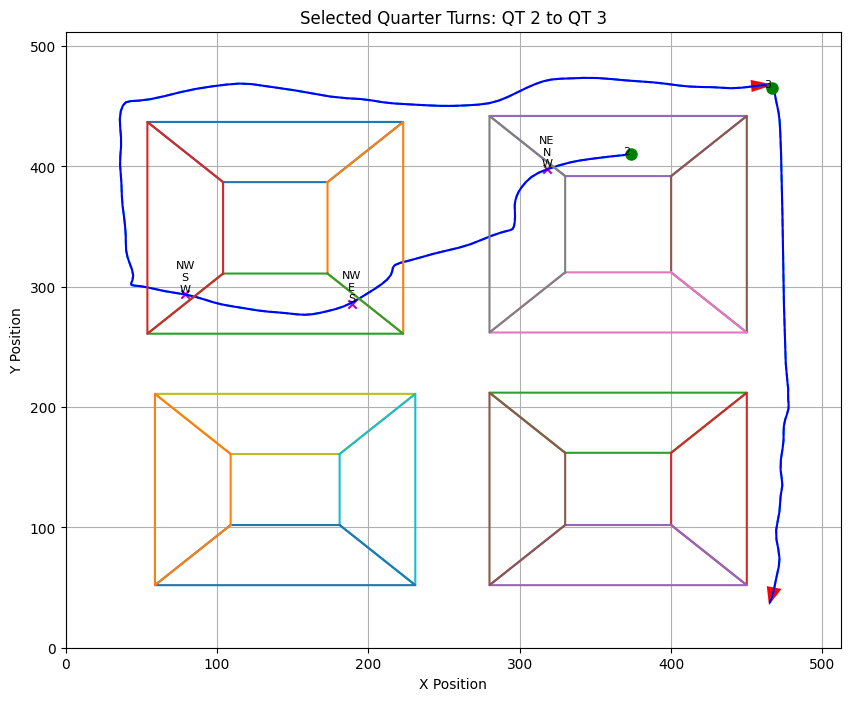

In [47]:

# Example usage:
# plot quarter turns 1 to 3
start_index, end_index,trapeze_switch_times=plot_selected_run_epochs(traject_time, smoothed_positions, clean_run_epochs, turns_df, first_epoch_to_plot=1, last_epoch_to_plot=3, points_for_direction=7)


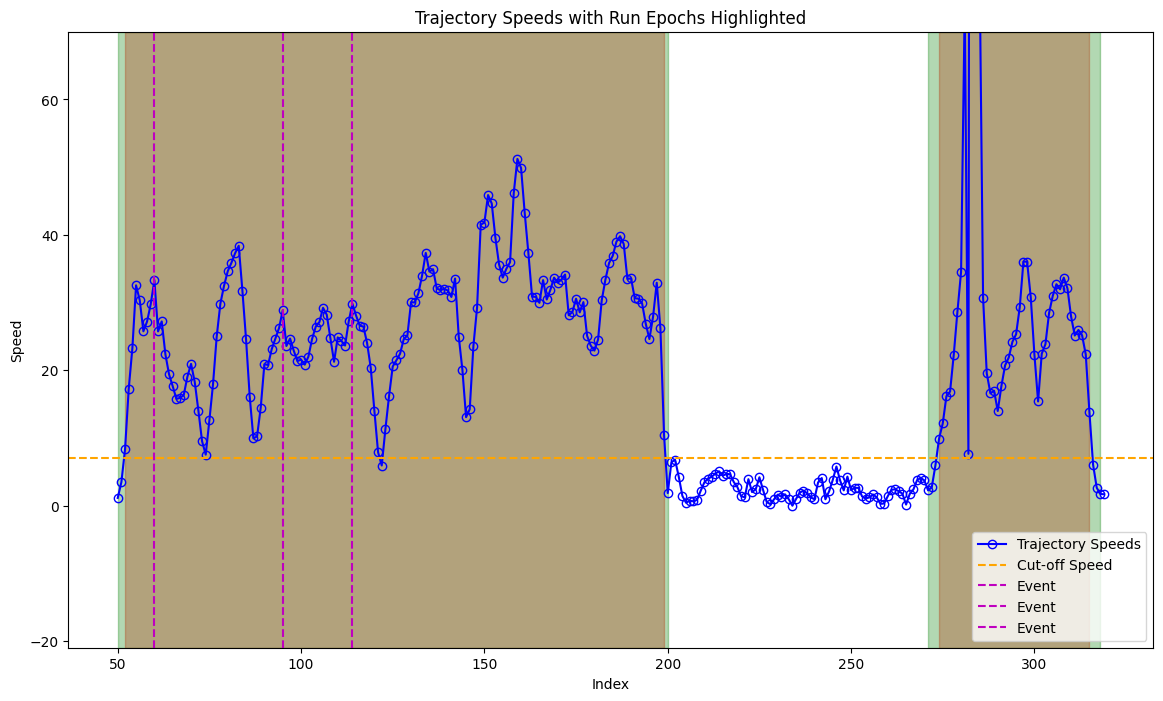

In [51]:
plot_trajectory_chunk(start_index, end_index+2, traject_time, trajectory_speeds, run_epochs, clean_run_epochs,cut_off_speed=7, events_list=trapeze_switch_times)

In [56]:
## this function allows to plot only a selected run epoch 


def plot_single_run_epoch(traject_time, smoothed_positions, run_epochs, turns_df, index_epoch_to_plot, points_for_direction=4):
    trapeze_switch_times=[]
    plt.figure(figsize=(10, 8))

    
    run_epoch = run_epochs[index_epoch_to_plot]
    start_index, end_index = run_epoch[0], run_epoch[1]
    #print(start_index,end_index)

   

    # Extract the run_epoch segment        
    run_epoch = [smoothed_positions[0][start_index: end_index+1],smoothed_positions[1][start_index: end_index+1]]
    times_run_epoch=traject_time[start_index: end_index+1]
    
    # Plot the raw trajectory of this epoch 
    plt.plot(run_epoch[0], run_epoch[1], linestyle='--', color='c')
    # Plot the smooth trajectory of this epoch 
    plt.plot(smoothed_positions[0][start_index: end_index+1],smoothed_positions[1][start_index: end_index+1], linestyle='-', color='b')


    # Mark the beginning of the trajectory
    plt.plot(run_epoch[0][0], run_epoch[1][0], 
                marker='o', color='g', markersize=8, 
                label='Start')

    # Compute the average direction based on the last few points
    end_points = [run_epoch[0][-points_for_direction:],run_epoch[1][-points_for_direction:]]
    # Transform to the desired format
    end_points = np.column_stack((end_points[0], end_points[1]))

    # Rounding to match the format more closely
    end_points = np.round(end_points)

    print(end_points)
    avg_diff, angle = compute_average_direction(end_points)

    # Draw an arrow at the end of the trajectory
    plt.arrow(
        run_epoch[0][-2], run_epoch[1][-2], 
        avg_diff[0], avg_diff[1],
        shape='full', lw=0, length_includes_head=True, head_width=10, color='r',
        label='End'
    )

    

    # Find turn in the turns_df data frame within this quarter turn based on time
    turns_in_QT = turns_df[(turns_df['time'] >= times_run_epoch[0]) & (turns_df['time'] <= times_run_epoch[-1])]
    #print(turns_in_QT)
    trapeze_switch_times.extend(turns_in_QT['time'].values)
    # Plot the switch of trapez as a cross marker on the trajectory
    plt.scatter(turns_in_QT['xposition'], video_resolution[1]-turns_in_QT['yposition'], marker='x', color='m', label='Turn Positions')

    # Add labels to turns indicating arrivalTrapeze, departureTrapeze, and currentPatchTower
    for _, turn in turns_in_QT.iterrows():
        plt.text(turn['xposition'], video_resolution[1]-turn['yposition'], f"{turn['currentPatch']}\n{turn['previousTrapeze']}\n{turn['currentTrapeze']}",
                    fontsize=8, color='black', ha='center', va='bottom')

    # Plot each square and trapeze
    for tower, trapezes in all_trapezes_coordinates.items():
        for trapeze, coordinates in trapezes.items():
            # Close the polygon by appending the first vertex
            coordinates.append(coordinates[0])
            # Extract x and y coordinates for plotting
            x_coords, y_coords = zip(*coordinates)
            plt.plot(x_coords, y_coords, label=f'{tower}_{trapeze}')

    # Set plot limits and labels
    plt.xlim(0, 512)
    plt.ylim(0, 512)
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.title(f' run epoch {index_epoch_to_plot+1}')
    plt.grid(True)
    #plt.legend()
    #plt.gca().invert_yaxis()  # Invert the y-axis
    plt.show()
    
    return start_index, end_index,trapeze_switch_times




[[434. 465.]
 [440. 465.]
 [447. 465.]
 [454. 467.]
 [460. 468.]
 [463. 468.]
 [463. 467.]]


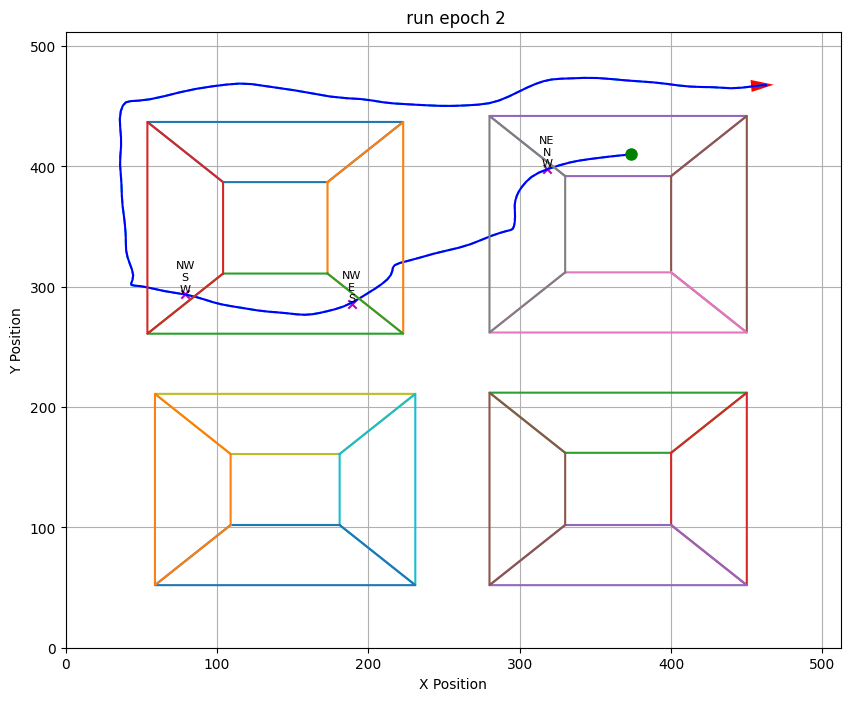

In [57]:

# Example usage:
# plot quarter turns 1 to 3
start_index, end_index,trapeze_switch_times=plot_single_run_epoch(traject_time, smoothed_positions, clean_run_epochs, turns_df, index_epoch_to_plot=1, points_for_direction=7)


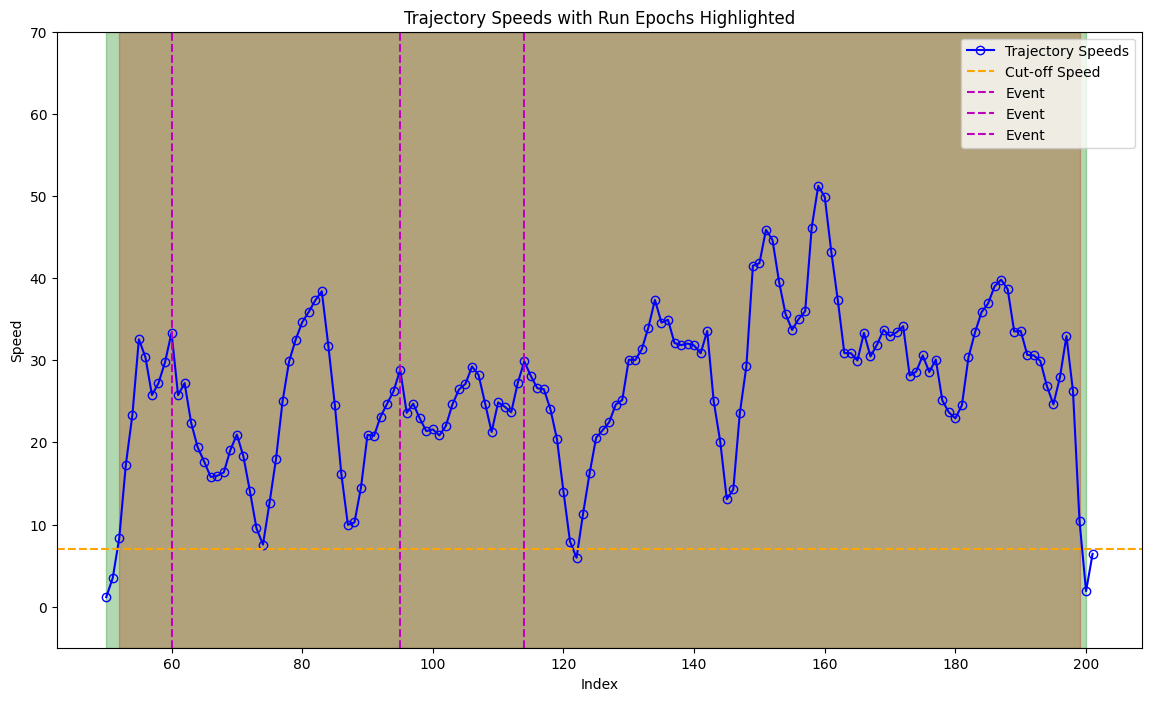

In [58]:
plot_trajectory_chunk(start_index, end_index+2, traject_time, trajectory_speeds, run_epochs, clean_run_epochs,cut_off_speed=7, events_list=trapeze_switch_times)

[[394. 408.]
 [388. 410.]
 [382. 411.]
 [377. 411.]
 [374. 411.]
 [373. 410.]
 [373. 410.]]


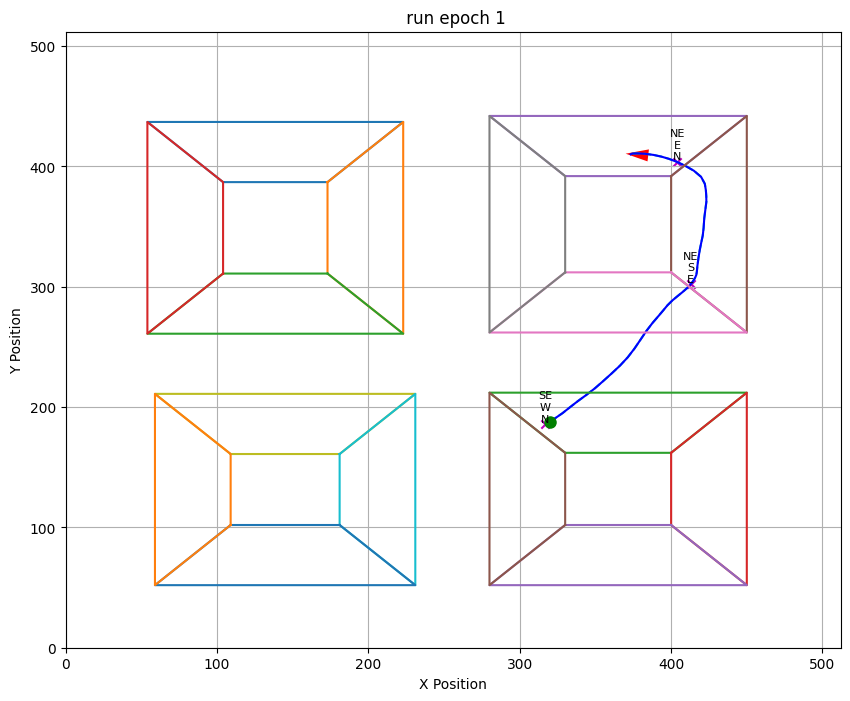

In [70]:

# Example usage:
# plot quarter turns 1 to 3
start_index, end_index,trapeze_switch_times=plot_single_run_epoch(traject_time, smoothed_positions, clean_run_epochs, turns_df, index_epoch_to_plot=0, points_for_direction=7)


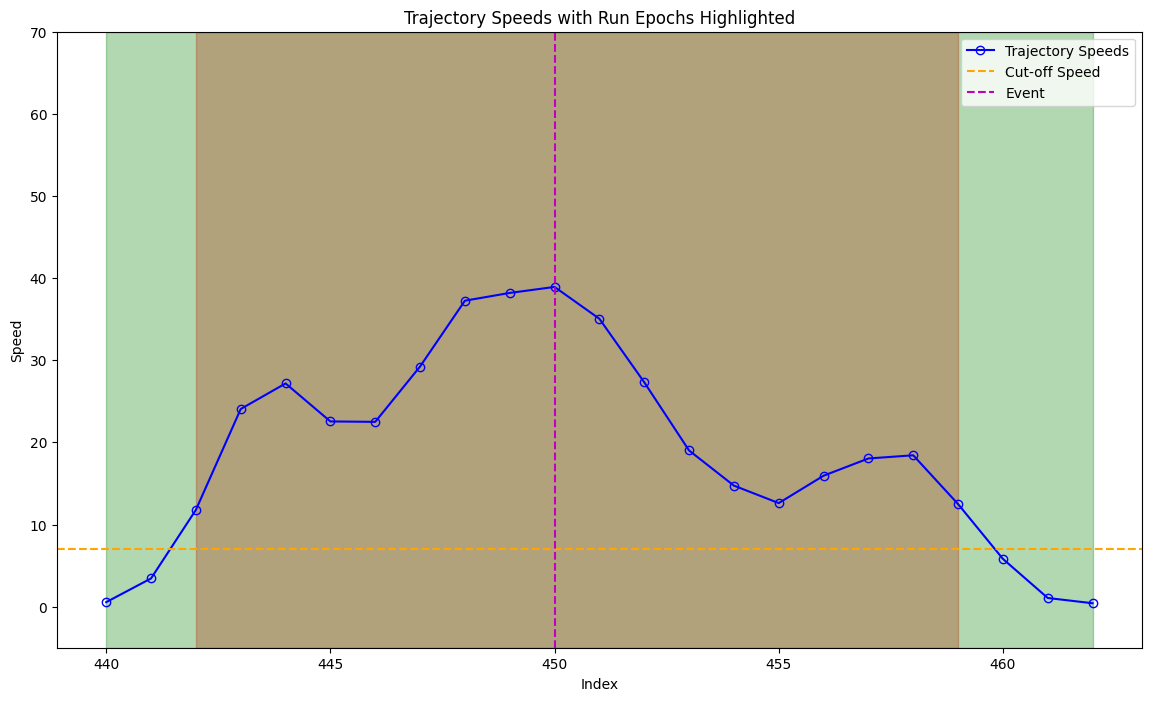

In [60]:
plot_trajectory_chunk(start_index, end_index+1, traject_time, trajectory_speeds, run_epochs, clean_run_epochs,cut_off_speed=7, events_list=trapeze_switch_times)

In [90]:
def check_position_in_trapezes(position, all_trapezes_coordinates):
    """
    Check if the position is inside any of the trapezes.
    :param position: Tuple (x, y) representing the position to check.
    :param all_trapezes_coordinates: Dictionary containing trapezes coordinates.
    :return: List [True, towerlabel, trapezelabel] if inside a trapeze, [False, 'none', 'none'] otherwise.
    """
    for towerlabel, trapezes in all_trapezes_coordinates.items():
        #print(towerlabel)
        for trapezelabel, trapeze_coordinates in trapezes.items():
            #print(trapezelabel)
            #print(trapeze_coordinates)
            if is_point_in_polygon(trapeze_coordinates,position):
                return [True, towerlabel, trapezelabel]
    return [False, 'none', 'none']

In [91]:
run_epochs_start_stop_info=[] * len(clean_run_epochs)

for epoch_index,run_epoch in enumerate(clean_run_epochs):
    print(run_epoch)
    start_index, end_index = run_epoch[0], run_epoch[1]
    run_epochs_start_stop_info[epoch_index].extend(run_epoch)

    starting_position=[smoothed_positions[0][start_index],smoothed_positions[1][start_index]]
    ending_position=[smoothed_positions[0][end_index],smoothed_positions[1][end_index]]
    print(starting_position)
    for position_to_check in [starting_position,ending_position]:
         #
         in_trapeze_info=check_position_in_trapezes(position_to_check, all_trapezes_coordinates)
         run_epochs_start_stop_info[epoch_index].extend(run_epoch)
         print(in_trapeze_info)

[0, 50]
[np.float64(319.79025241002046), np.float64(188.01365925100512)]
[True, 'SE', 'N']
[True, 'NE', 'N']
[50, 200]
[np.float64(373.2818298300254), np.float64(410.0539911274207)]
[True, 'NE', 'N']
[False, 'none', 'none']
[271, 318]
[np.float64(466.42247525814656), np.float64(465.51413456869426)]
[False, 'none', 'none']
[False, 'none', 'none']
[329, 353]
[np.float64(463.88261869942005), np.float64(38.936877488090005)]
[False, 'none', 'none']
[True, 'SE', 'S']
[357, 377]
[np.float64(350.2534988621852), np.float64(77.94641036445314)]
[True, 'SE', 'S']
[True, 'SE', 'W']
[391, 433]
[np.float64(298.0001338306246), np.float64(120.14101274555085)]
[True, 'SE', 'W']
[True, 'SE', 'E']
[440, 462]
[np.float64(415.99516664650616), np.float64(152.85415390095528)]
[True, 'SE', 'E']
[True, 'SE', 'S']
[462, 478]
[np.float64(361.1995077347645), np.float64(82.00469952286926)]
[True, 'SE', 'S']
[True, 'SE', 'W']
[488, 505]
[np.float64(297.9461427032039), np.float64(119.1364470533062)]
[True, 'SE', 'W']

In [92]:
len(clean_run_epochs)

464

In [ ]:
is_point_in_polygon(polygon_vertices, point)